In [1]:
'''
Linear Regression to determine how features affect house price
'''

'\nHow features affect price of house\n'

In [ ]:
'''
Prep dataframe
'''

In [2187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [2188]:
data=data.drop(['id'], axis=1)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [2189]:
data=data.mask(data=='NaN').fillna(data.mean())
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.007596,0.0,3,7,1180,0.0,1955,0.000000,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.000000,0.0,3,7,2170,400.0,1951,1991.000000,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.000000,0.0,3,6,770,0.0,1933,83.636778,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.000000,0.0,5,7,1050,910.0,1965,0.000000,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.000000,0.0,3,8,1680,0.0,1987,0.000000,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.000000,0.0,3,8,1530,0.0,2009,0.000000,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.000000,0.0,3,8,2310,0.0,2014,0.000000,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.000000,0.0,3,7,1020,0.0,2009,0.000000,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.007596,0.0,3,8,1600,0.0,2004,0.000000,98027,47.5345,-122.069,1410,1287


In [2190]:
y=data[('price')]

In [2191]:
X=data.drop(['price'], axis=1)

In [2192]:
'''
Data Cleaning
'''

'\nData Cleaning\n'

In [2193]:
#determine columns with '?' as values and thier mode
list1=[]
for column in data.columns:
    for i in data[(f'{column}')]:
        if i == '?':
            list1.append(column)

            mode = data[(f'{column}')].mode()


print(f'Columns:{set(list1)}')
print(f'Value:{mode}')

Columns:{'sqft_basement'}
Value:0    0.0
dtype: object


In [2194]:
#determine columns with '?' as values and thier mode
list1=[]
for column in X.columns:
    for i in X[(f'{column}')]:
        if i == '?':
            list1.append(column)

            mode = X[(f'{column}')].mode()


print(f'Columns:{set(list1)}')
print(f'Value:{mode}')

Columns:{'sqft_basement'}
Value:0    0.0
dtype: object


In [2195]:
#replace '?' with mode
sqft_basement1=[]

for i in data[('sqft_basement')]:
    if i != '?':
        #print(i)
        sqft_basement1.append(i)
    elif i == '?':
            #print(i)
            i=i.replace('?', '0')
            #print(i)
            sqft_basement1.append(i)
sqft_basement1=pd.DataFrame(sqft_basement1)
sqft_basement1

,0
0,0.0
1,400.0
2,0.0
3,910.0
4,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


In [2196]:
#replace '?' with mode
sqft_basement1=[]

for i in X[('sqft_basement')]:
    if i != '?':
        #print(i)
        sqft_basement1.append(i)
    elif i == '?':
            #print(i)
            i=i.replace('?', '0')
            #print(i)
            sqft_basement1.append(i)
sqft_basement1=pd.DataFrame(sqft_basement1)
sqft_basement1

,0
0,0.0
1,400.0
2,0.0
3,910.0
4,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


In [2197]:
data.reset_index(drop=True, inplace=True)
sqft_basement1.reset_index(drop=True, inplace=True)

In [2198]:
X.reset_index(drop=True, inplace=True)
sqft_basement1.reset_index(drop=True, inplace=True)

In [2199]:
data=pd.concat([data,sqft_basement1],axis=1)

In [2200]:
X=pd.concat([X,sqft_basement1],axis=1)

In [2201]:
data=data.drop(['sqft_basement'], axis=1)

In [2202]:
X=X.drop(['sqft_basement'], axis=1)

In [2203]:
data=data.rename(columns={0: 'sqft_basement'})
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.007596,0.0,3,7,1180,1955,0.000000,98178,47.5112,-122.257,1340,5650,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.000000,0.0,3,7,2170,1951,1991.000000,98125,47.7210,-122.319,1690,7639,400.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.000000,0.0,3,6,770,1933,83.636778,98028,47.7379,-122.233,2720,8062,0.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.000000,0.0,5,7,1050,1965,0.000000,98136,47.5208,-122.393,1360,5000,910.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.000000,0.0,3,8,1680,1987,0.000000,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.000000,0.0,3,8,1530,2009,0.000000,98103,47.6993,-122.346,1530,1509,0.0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.000000,0.0,3,8,2310,2014,0.000000,98146,47.5107,-122.362,1830,7200,0.0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.000000,0.0,3,7,1020,2009,0.000000,98144,47.5944,-122.299,1020,2007,0.0
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.007596,0.0,3,8,1600,2004,0.000000,98027,47.5345,-122.069,1410,1287,0.0


In [2204]:
X=X.rename(columns={0: 'sqft_basement'})
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,10/13/2014,3,1.00,1180,5650,1.0,0.007596,0.0,3,7,1180,1955,0.000000,98178,47.5112,-122.257,1340,5650,0.0
1,12/9/2014,3,2.25,2570,7242,2.0,0.000000,0.0,3,7,2170,1951,1991.000000,98125,47.7210,-122.319,1690,7639,400.0
2,2/25/2015,2,1.00,770,10000,1.0,0.000000,0.0,3,6,770,1933,83.636778,98028,47.7379,-122.233,2720,8062,0.0
3,12/9/2014,4,3.00,1960,5000,1.0,0.000000,0.0,5,7,1050,1965,0.000000,98136,47.5208,-122.393,1360,5000,910.0
4,2/18/2015,3,2.00,1680,8080,1.0,0.000000,0.0,3,8,1680,1987,0.000000,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,3,2.50,1530,1131,3.0,0.000000,0.0,3,8,1530,2009,0.000000,98103,47.6993,-122.346,1530,1509,0.0
21593,2/23/2015,4,2.50,2310,5813,2.0,0.000000,0.0,3,8,2310,2014,0.000000,98146,47.5107,-122.362,1830,7200,0.0
21594,6/23/2014,2,0.75,1020,1350,2.0,0.000000,0.0,3,7,1020,2009,0.000000,98144,47.5944,-122.299,1020,2007,0.0
21595,1/16/2015,3,2.50,1600,2388,2.0,0.007596,0.0,3,8,1600,2004,0.000000,98027,47.5345,-122.069,1410,1287,0.0


In [2205]:
data['sqft_basement']=data['sqft_basement'].astype('float64')
data['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [2206]:
X['sqft_basement']=X['sqft_basement'].astype('float64')
X['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [2207]:
Independent_Variables= X

In [2208]:
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,10/13/2014,3,1.00,1180,5650,1.0,0.007596,0.0,3,7,1180,1955,0.000000,98178,47.5112,-122.257,1340,5650,0.0
1,12/9/2014,3,2.25,2570,7242,2.0,0.000000,0.0,3,7,2170,1951,1991.000000,98125,47.7210,-122.319,1690,7639,400.0
2,2/25/2015,2,1.00,770,10000,1.0,0.000000,0.0,3,6,770,1933,83.636778,98028,47.7379,-122.233,2720,8062,0.0
3,12/9/2014,4,3.00,1960,5000,1.0,0.000000,0.0,5,7,1050,1965,0.000000,98136,47.5208,-122.393,1360,5000,910.0
4,2/18/2015,3,2.00,1680,8080,1.0,0.000000,0.0,3,8,1680,1987,0.000000,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,3,2.50,1530,1131,3.0,0.000000,0.0,3,8,1530,2009,0.000000,98103,47.6993,-122.346,1530,1509,0.0
21593,2/23/2015,4,2.50,2310,5813,2.0,0.000000,0.0,3,8,2310,2014,0.000000,98146,47.5107,-122.362,1830,7200,0.0
21594,6/23/2014,2,0.75,1020,1350,2.0,0.000000,0.0,3,7,1020,2009,0.000000,98144,47.5944,-122.299,1020,2007,0.0
21595,1/16/2015,3,2.50,1600,2388,2.0,0.007596,0.0,3,8,1600,2004,0.000000,98027,47.5345,-122.069,1410,1287,0.0


In [2209]:
'''
Adjust variables
'''

'\nAdjust variables\n'

In [2210]:
unique_variables=X.nunique()
unique_variables

date              372
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          3
view                6
condition           5
grade              11
sqft_above        942
yr_built          116
yr_renovated       71
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
sqft_basement     303
dtype: int64

In [2211]:
categorical_variables=.001>unique_variables/21596
categorical_variables

date             False
bedrooms          True
bathrooms        False
sqft_living      False
sqft_lot         False
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above       False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
sqft_basement    False
dtype: bool

In [2212]:
X.columns = pd.Series(X.columns)
for (i,l) in zip(categorical_variables,X.columns):
    if i == True:
        X[l]=X[l].astype('category')
        print(pd.get_dummies(X[l]))
        
        
        
X.dtypes

bedrooms  1   2   3   4   5   6   7   8   9   10  11  33
0          0   0   1   0   0   0   0   0   0   0   0   0
1          0   0   1   0   0   0   0   0   0   0   0   0
2          0   1   0   0   0   0   0   0   0   0   0   0
3          0   0   0   1   0   0   0   0   0   0   0   0
4          0   0   1   0   0   0   0   0   0   0   0   0
...       ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
21592      0   0   1   0   0   0   0   0   0   0   0   0
21593      0   0   0   1   0   0   0   0   0   0   0   0
21594      0   1   0   0   0   0   0   0   0   0   0   0
21595      0   0   1   0   0   0   0   0   0   0   0   0
21596      0   1   0   0   0   0   0   0   0   0   0   0

[21597 rows x 12 columns]
floors  1.0  1.5  2.0  2.5  3.0  3.5
0         1    0    0    0    0    0
1         0    0    1    0    0    0
2         1    0    0    0    0    0
3         1    0    0    0    0    0
4         1    0    0    0    0    0
...     ...  ...  ...  ...  ...  ...
21592     0    0    0    0    

date               object
bedrooms         category
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors           category
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
sqft_basement     float64
dtype: object

In [2213]:
X['date']=X['date'].astype('category')

In [2214]:
pd.get_dummies(X['date'])

date,1/10/2015,1/12/2015,1/13/2015,1/14/2015,1/15/2015,1/16/2015,1/17/2015,1/19/2015,1/2/2015,1/20/2015,...,9/28/2014,9/29/2014,9/3/2014,9/30/2014,9/4/2014,9/5/2014,9/6/2014,9/7/2014,9/8/2014,9/9/2014
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2215]:
#make each date into a number
X['date']=X['date'].cat.codes

In [2216]:
X['zipcode']=X['zipcode'].astype('category')

In [2217]:
pd.get_dummies(X['zipcode'])

zipcode,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2218]:
X.dtypes

date                int16
bedrooms         category
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors           category
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
yr_built            int64
yr_renovated      float64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
sqft_basement     float64
dtype: object

In [2219]:
zipcode_dummies = pd.get_dummies(X['zipcode'], prefix='zipcode', drop_first=True)
grade_dummies = pd.get_dummies(X['grade'], prefix='grade', drop_first=True)
condition_dummies = pd.get_dummies(X['condition'], prefix='condition', drop_first=True)
view_dummies = pd.get_dummies(X['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(X['waterfront'], prefix='waterfront', drop_first=True)
floors_dummies = pd.get_dummies(X['floors'], prefix='floors', drop_first=True)
bathrooms_dummies = pd.get_dummies(X['bathrooms'], prefix='bathrooms', drop_first=True)
bedrooms_dummies = pd.get_dummies(X['bedrooms'], prefix='bedrooms', drop_first=True)
date_dummies = pd.get_dummies(X['date'], prefix='date', drop_first=True)

In [2220]:
X = X.drop(['zipcode','grade','condition','view', 'waterfront', 'floors', 'bathrooms', 'bedrooms', 'date'], axis=1)

In [2221]:
X = pd.concat([X, date_dummies, bedrooms_dummies, bathrooms_dummies, floors_dummies,waterfront_dummies, view_dummies,condition_dummies,grade_dummies,zipcode_dummies], axis=1)
X

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,5650,1180,1955,0.000000,47.5112,-122.257,1340,5650,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,2170,1951,1991.000000,47.7210,-122.319,1690,7639,400.0,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,770,1933,83.636778,47.7379,-122.233,2720,8062,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,1965,0.000000,47.5208,-122.393,1360,5000,910.0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,1680,1987,0.000000,47.6168,-122.045,1800,7503,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,0.000000,47.6993,-122.346,1530,1509,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,2310,2014,0.000000,47.5107,-122.362,1830,7200,0.0,...,1,0,0,0,0,0,0,0,0,0
21594,1020,1350,1020,2009,0.000000,47.5944,-122.299,1020,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,1600,2388,1600,2004,0.000000,47.5345,-122.069,1410,1287,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2222]:
X['bedrooms_6']

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: bedrooms_6, Length: 21597, dtype: uint8

In [2165]:
'''
Run OLS
'''

'\nRun OLS\n'

In [2166]:
import statsmodels.api as sm

predictors_int = sm.add_constant(X)
model = sm.OLS(y,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     225.5
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        18:15:52   Log-Likelihood:            -2.8716e+05
No. Observations:               21597   AIC:                         5.754e+05
Df Residuals:                   21081   BIC:                         5.795e+05
Df Model:                         515                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -3.45e+07   5.65e+06     -6.105      0.000   -4.56e+07   -2.34e+07
sqft_living                        99.0407     13.277      7.460      0.000      73.017     125.065
sqft_lot                            0.2550      0.035      7.209      0.000       0.186       0.324
sqft_above                         55.7390     13.334      4.180      0.000      29.603      81.875
yr_built                         -129.0263     64.649     -1.996      0.046    -255.744      -2.309
yr_renovated                       33.4094      2.977     11.224      0.000      27.575      39.244
lat                              1.975e+05   5.81e+04      3.397      0.001    8.35e+04    3.11e+05
long                            -2.073e+05   4.19e+04     -4.951      0.000   -2.89e+05   -1.25e+05
sqft_living15                      22.1119      2.711      8.155      0.000      16.797      27.426
sqft_lot15                         -0.1990      0.056     -3.574      0.000      -0.308      -0.090
sqft_basement                      11.5818     13.140      0.881      0.378     -14.173      37.337
date_1                           2.814e+04   1.48e+05      0.191      0.849   -2.61e+05    3.18e+05
date_2                           4.651e+04   1.48e+05      0.315      0.753   -2.43e+05    3.36e+05
date_3                            1.21e+04   1.47e+05      0.082      0.935   -2.77e+05    3.01e+05
date_4                           2.632e+04   1.48e+05      0.178      0.858   -2.63e+05    3.16e+05
date_5                          -1.818e+04   1.47e+05     -0.123      0.902   -3.07e+05    2.71e+05
date_6                           9.484e+04   2.06e+05      0.460      0.646    -3.1e+05    4.99e+05
date_7                           -1.41e+04   1.55e+05     -0.091      0.927   -3.18e+05    2.89e+05
date_8                           5.031e+04   1.48e+05      0.341      0.733   -2.39e+05     3.4e+05
date_9                           5.059e+04   1.48e+05      0.343      0.732   -2.39e+05     3.4e+05
date_10                          4.136e+04   1.47e+05      0.281      0.779   -2.47e+05     3.3e+05
date_11                           2.11e+04   1.47e+05      0.143      0.886   -2.68e+05     3.1e+05
date_12                          -967.7197   1.47e+05     -0.007      0.995    -2.9e+05    2.88e+05
date_13                         -1.188e+05   1.63e+05     -0.728      0.467   -4.39e+05    2.01e+05
date_14                          5.098e+04   1.68e+05      0.303      0.762   -2.79e+05    3.81e+05
date_15                         -8132.3977   1.47e+05     -0.055      0.956   -2.97e+05    2.81e+05
date_16                          5.045e+04   1.47e+05      0.343      0.732   -2.38e+05    3.39e+05
date_17                          1.829e+04   1.47e+05      0.124      0.901    -2.7

In [1334]:
'''
Error when attempt to index the model, so unable to conduct stepwise selection, conditionally iterate through 
p value column, automatedly.  
'''

'\nError when attempt to index the model, so unable to conduct stepwise selection, conditionally iterate through \np value column, automatedly.  \n'

In [864]:
''' 
Statistical significance indicates that changes in both the independent and dependent variables are correlated.
Build model with only statistically significant p values.
'''

' \nStatistical significance indicates that changes in both the independent and dependent variables are correlated.\nBuild model with only statistically significant p values.\n'

In [2223]:
X1=pd.DataFrame()
X1['sqft_living']=X['sqft_living']
X1['sqft_lot']=X['sqft_lot']
X1['sqft_above']=X['sqft_above']
X1['yr_built']=X['yr_built']
X1['yr_renovated']=X['yr_renovated']
X1['lat']=X['lat']
X1['long']=X['long']
X1['sqft_living15']=X['sqft_living15']
X1['sqft_lot15']=X['sqft_lot15']
X1['bedrooms_6']=X['bedrooms_6']
X1['bedrooms_7']=X['bedrooms_7']
X1['bedrooms_9']=X['bedrooms_9']
X1['bedrooms_10']=X['bedrooms_10']
X1['bathrooms_4.25']=X['bathrooms_4.25']
X1['bathrooms_4.5']=X['bathrooms_4.5']
X1['bathrooms_4.75']=X['bathrooms_4.75']
X1['bathrooms_5.0']=X['bathrooms_5.0']
X1['bathrooms_5.25']=X['bathrooms_5.25']
X1['bathrooms_5.5']=X['bathrooms_5.5']
X1['bathrooms_5.75']=X['bathrooms_5.75']
X1['bathrooms_6.0']=X['bathrooms_6.0']
X1['bathrooms_6.25']=X['bathrooms_6.25']
X1['bathrooms_6.75']=X['bathrooms_4.25']
X1['bathrooms_7.75']=X['bathrooms_7.75']
X1['bathrooms_8.0']=X['bathrooms_8.0']
X1['floors_2.0']=X['floors_2.0']
X1['floors_2.5']=X['floors_2.5']
X1['floors_3.0']=X['floors_3.0']
X1['waterfront_1.0']=X['waterfront_1.0']
X1['view_0.23386272870808952']=X['view_0.23386272870808952']
X1['view_1.0']=X['view_1.0']
X1['view_2.0']=X['view_2.0']
X1['view_.0']=X['view_3.0']
X1['view_4.0']=X['view_4.0']
X1['condition_2']=X['condition_2']
X1['condition_3']=X['condition_3']
X1['condition_4']=X['condition_4']
X1['condition_5']=X['condition_5']
X1['condition_3']=X['condition_3']
X1['grade_12']=X['grade_12']
X1['grade_13']=X['grade_13']
X1['zipcode_98004']=X['zipcode_98004']
X1['zipcode_98005']=X['zipcode_98005']
X1['zipcode_98006']=X['zipcode_98006']
X1['zipcode_98007']=X['zipcode_98007']
X1['zipcode_98008']=X['zipcode_98008']
X1['zipcode_98010']=X['zipcode_98010']
X1['zipcode_98014']=X['zipcode_98014']
X1['zipcode_98019']=X['zipcode_98019']
X1['zipcode_98022']=X['zipcode_98022']
X1['zipcode_98023']=X['zipcode_98023']
X1['zipcode_98024']=X['zipcode_98024']
X1['zipcode_98027']=X['zipcode_98027']
X1['zipcode_98029']=X['zipcode_98029']
X1['zipcode_98033']=X['zipcode_98033']
X1['zipcode_98034']=X['zipcode_98034']
X1['zipcode_98038']=X['zipcode_98038']
X1['zipcode_98039']=X['zipcode_98039']
X1['zipcode_98040']=X['zipcode_98040']
X1['zipcode_98045']=X['zipcode_98045']
X1['zipcode_98052']=X['zipcode_98052']
X1['zipcode_98053']=X['zipcode_98053']
X1['zipcode_98056']=X['zipcode_98056']
X1['zipcode_98058']=X['zipcode_98058']
X1['zipcode_98059']=X['zipcode_98059']
X1['zipcode_98065']=X['zipcode_98065']
X1['zipcode_98070']=X['zipcode_98070']
X1['zipcode_98072']=X['zipcode_98072']
X1['zipcode_98074']=X['zipcode_98074']
X1['zipcode_98075']=X['zipcode_98075']
X1['zipcode_98077']=X['zipcode_98077']
X1['zipcode_98102']=X['zipcode_98102']
X1['zipcode_98103']=X['zipcode_98103']
X1['zipcode_98105']=X['zipcode_98105']
X1['zipcode_98106']=X['zipcode_98106']
X1['zipcode_98107']=X['zipcode_98107']
X1['zipcode_98108']=X['zipcode_98108']
X1['zipcode_98109']=X['zipcode_98109']
X1['zipcode_98112']=X['zipcode_98112']
X1['zipcode_98115']=X['zipcode_98115']
X1['zipcode_98116']=X['zipcode_98116']
X1['zipcode_98117']=X['zipcode_98117']
X1['zipcode_98118']=X['zipcode_98118']
X1['zipcode_98119']=X['zipcode_98119']
X1['zipcode_98122']=X['zipcode_98122']
X1['zipcode_98125']=X['zipcode_98125']
X1['zipcode_98126']=X['zipcode_98126']
X1['zipcode_98133']=X['zipcode_98133']
X1['zipcode_98136']=X['zipcode_98136']
X1['zipcode_98144']=X['zipcode_98144']
X1['zipcode_98146']=X['zipcode_98146']
X1['zipcode_98177']=X['zipcode_98177']
X1['zipcode_98198']=X['zipcode_98198']
X1['zipcode_98199']=X['zipcode_98199']

In [1017]:
X1

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms_6,...,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98198,zipcode_98199
0,1180,5650,1180,1955,0.000000,47.5112,-122.257,1340,5650,0,...,0,0,0,0,0,0,0,0,0,0
1,2570,7242,2170,1951,1991.000000,47.7210,-122.319,1690,7639,0,...,0,1,0,0,0,0,0,0,0,0
2,770,10000,770,1933,83.636778,47.7379,-122.233,2720,8062,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,1965,0.000000,47.5208,-122.393,1360,5000,0,...,0,0,0,0,1,0,0,0,0,0
4,1680,8080,1680,1987,0.000000,47.6168,-122.045,1800,7503,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,0.000000,47.6993,-122.346,1530,1509,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,2310,2014,0.000000,47.5107,-122.362,1830,7200,0,...,0,0,0,0,0,0,1,0,0,0
21594,1020,1350,1020,2009,0.000000,47.5944,-122.299,1020,2007,0,...,0,0,0,0,0,1,0,0,0,0
21595,1600,2388,1600,2004,0.000000,47.5345,-122.069,1410,1287,0,...,0,0,0,0,0,0,0,0,0,0


In [1542]:
import statsmodels.api as sm

predictors_int = sm.add_constant(X1)
model = sm.OLS(y,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1083.
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        15:05:59   Log-Likelihood:            -2.8873e+05
No. Observations:               21597   AIC:                         5.776e+05
Df Residuals:                   21504   BIC:                         5.784e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -3.77e+07   3.36e+06    -11.233      0.000   -4.43e+07   -3.11e+07
sqft_living                124.4999      2.895     43.006      0.000     118.826     130.174
sqft_lot                     0.3166      0.037      8.522      0.000       0.244       0.389
sqft_above                  79.6711      3.403     23.412      0.000      73.001      86.341
yr_built                   221.4615     59.014      3.753      0.000     105.790     337.133
yr_renovated                32.2729      3.090     10.443      0.000      26.216      38.330
lat                       3.202e+05   1.45e+04     22.102      0.000    2.92e+05    3.49e+05
long                     -1.786e+05    2.8e+04     -6.368      0.000   -2.34e+05   -1.24e+05
sqft_living15               46.6521      2.723     17.134      0.000      41.315      51.989
sqft_lot15                  -0.1836      0.058     -3.147      0.002      -0.298      -0.069
bedrooms_6                -7.28e+04   9805.187     -7.424      0.000    -9.2e+04   -5.36e+04
bedrooms_7                -1.92e+05   2.58e+04     -7.452      0.000   -2.43e+05   -1.42e+05
bedrooms_9               -2.436e+05    6.4e+04     -3.804      0.000   -3.69e+05   -1.18e+05
bedrooms_10              -3.905e+05    9.1e+04     -4.293      0.000   -5.69e+05   -2.12e+05
bathrooms_4.25            1.002e+05   8939.993     11.204      0.000    8.26e+04    1.18e+05
bathrooms_4.5             1.329e+05   1.61e+04      8.271      0.000    1.01e+05    1.64e+05
bathrooms_4.75            4.159e+05   3.29e+04     12.636      0.000    3.51e+05     4.8e+05
bathrooms_5.0             2.421e+05   3.43e+04      7.050      0.000    1.75e+05    3.09e+05
bathrooms_5.25            2.501e+05   4.42e+04      5.664      0.000    1.64e+05    3.37e+05
bathrooms_5.5             4.123e+05   5.08e+04      8.120      0.000    3.13e+05    5.12e+05
bathrooms_5.75            1.398e+05      8e+04      1.747      0.081    -1.7e+04    2.97e+05
bathrooms_6.0             6.265e+05   6.53e+04      9.590      0.000    4.98e+05    7.55e+05
bathrooms_6.25             4.63e+05   1.13e+05      4.102      0.000    2.42e+05    6.84e+05
bathrooms_6.75            1.002e+05   8939.993     11.204      0.000    8.26e+04    1.18e+05
bathrooms_7.75            2.225e+06   1.65e+05     13.502      0.000     1.9e+06    2.55e+06
bathrooms_8.0              1.23e+06   1.15e+05     10.690      0.000       1e+06    1.46e+06
floors_2.0               -2.575e+04   3413.738     -7.544      0.000   -3.24e+04   -1.91e+04
floors_2.5                 6.82e+04   1.29e+04      5.301      0.000     4.3e+04    9.34e+04
floors_3.0               -6.127e+04   7872.459     -7.783      0.000   -7.67e+04   -4.58e+04
waterfront_1.0             6.08e+05    1.6e+04     37.942      0.000    5.77e+05    6.39e+05
view_0.2338627

In [2224]:
X1=X1.drop(['bathrooms_5.75','zipcode_98019','zipcode_98058'] ,axis=1)

In [1544]:
import statsmodels.api as sm

predictors_int = sm.add_constant(X1)
model = sm.OLS(y,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1119.
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        15:06:04   Log-Likelihood:            -2.8873e+05
No. Observations:               21597   AIC:                         5.776e+05
Df Residuals:                   21507   BIC:                         5.784e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.673e+07   2.82e+06    -13.017      0.000   -4.23e+07   -3.12e+07
sqft_living                124.7612      2.893     43.131      0.000     119.092     130.431
sqft_lot                     0.3200      0.037      8.621      0.000       0.247       0.393
sqft_above                  79.7067      3.403     23.422      0.000      73.037      86.377
yr_built                   221.3803     59.008      3.752      0.000     105.721     337.040
yr_renovated                32.3539      3.090     10.470      0.000      26.297      38.411
lat                       3.193e+05   1.33e+04     23.961      0.000    2.93e+05    3.45e+05
long                      -1.71e+05   2.24e+04     -7.628      0.000   -2.15e+05   -1.27e+05
sqft_living15               46.4521      2.717     17.094      0.000      41.126      51.778
sqft_lot15                  -0.1899      0.058     -3.260      0.001      -0.304      -0.076
bedrooms_6               -7.292e+04   9805.540     -7.437      0.000   -9.21e+04   -5.37e+04
bedrooms_7               -1.884e+05   2.57e+04     -7.337      0.000   -2.39e+05   -1.38e+05
bedrooms_9               -2.435e+05    6.4e+04     -3.803      0.000   -3.69e+05   -1.18e+05
bedrooms_10              -3.902e+05    9.1e+04     -4.289      0.000   -5.68e+05   -2.12e+05
bathrooms_4.25            9.966e+04   8937.297     11.151      0.000    8.21e+04    1.17e+05
bathrooms_4.5             1.322e+05   1.61e+04      8.228      0.000    1.01e+05    1.64e+05
bathrooms_4.75            4.142e+05   3.29e+04     12.590      0.000     3.5e+05    4.79e+05
bathrooms_5.0             2.403e+05   3.43e+04      7.000      0.000    1.73e+05    3.08e+05
bathrooms_5.25            2.483e+05   4.41e+04      5.625      0.000    1.62e+05    3.35e+05
bathrooms_5.5             4.089e+05   5.07e+04      8.064      0.000     3.1e+05    5.08e+05
bathrooms_6.0              6.23e+05   6.53e+04      9.541      0.000    4.95e+05    7.51e+05
bathrooms_6.25            4.554e+05   1.13e+05      4.038      0.000    2.34e+05    6.76e+05
bathrooms_6.75            9.966e+04   8937.297     11.151      0.000    8.21e+04    1.17e+05
bathrooms_7.75            2.208e+06   1.65e+05     13.421      0.000    1.89e+06    2.53e+06
bathrooms_8.0             1.218e+06   1.15e+05     10.599      0.000    9.92e+05    1.44e+06
floors_2.0               -2.591e+04   3411.520     -7.594      0.000   -3.26e+04   -1.92e+04
floors_2.5                6.767e+04   1.29e+04      5.260      0.000    4.25e+04    9.29e+04
floors_3.0               -6.129e+04   7872.139     -7.785      0.000   -7.67e+04   -4.59e+04
waterfront_1.0            6.075e+05    1.6e+04     37.917      0.000    5.76e+05    6.39e+05
view_0.23386272870808952  5.639e+04   1.96e+04      2.870      0.004    1.79e+04    9.49e+04
view_1.0      

In [748]:
'''
Degrees of freedom are the number of independent ways by which, without violating model constraint, 
values are free to varry. 
The model has 89 parameters used to explain 21507 residuals.  
'''

'\nDegrees of freedom are the number of independent ways by which, without violating model constraint, \nvalues are free to varry. \nThe model has 89 parameters used to explain 21507 residuals.  \n'

In [435]:
'''
R-squared is the proportion of the variance for a dependent variable that is explained by an independent variable.
82 percent of dependent variable variance is explaind by independent variable variance.
R-squared increses for every feature added, regardless of statistical significance.  
Adjusted R-squared increases only if each feature improves the model more than expected by chance.   
'''

'\nR-squared is the proportion of the variance for a dependent variable that is explained by an independent variable.\n82 percent of dependent variable variance is explaind by independent variable variance.\nR-squared increses for every feature added, regardless of statistical significance.  \nAdjusted R-squared increases only if each feature improves the model more than expected by chance.   \n'

In [436]:
'''
F test simultaneously evaluates multiple features for significance.  
F test null hypothesis is the average model fits the data as well as the more fitted model.
p value is statistically significant, so reject null.  
'''

'\nF test simultaneously evaluates multiple features for significance.  \nF test null hypothesis is the average model fits the data as well as the more fitted model.\np value is statistically significant, so reject null.  \n'

In [437]:
'''
Each regression coefficient value represents by how much the dependant variable changes given a 1 unit adjustmemt of the
coefficient.  
Each independent variable p-value determines whether the independent variable and the dependent variable have a 
relationship.
We will be using a critical value of .05 to determine statistical significance.  

'''

'\nEach regression coefficient value represents by how much the dependant variable changes given a 1 unit increase of the\ncoefficient.  \n'

In [438]:
'''
Skew of 2.3 means the distribution is a bit skewed and Kurtosis of 39.7 means the distribution is leptokurtic.
'''

'\nSkew of 2.3 means the distribution is a bit skewed and Kurtosis of 39.7 means the distribution is leptokurtic.\n'

In [439]:
'''
Validation
'''

'\nValidation\n'

In [ ]:
'''
Mean Squared Error, MSE, is the average distance of the residuals from the function.  

The train MSE is used on most of the data to prepare for prediction, and the test MSE is used on the remaining data to
evaluate model prediction efficiency.  
'''

In [875]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [876]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [877]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [878]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [879]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', np.sqrt(train_mse))
print('Test Mean Squarred Error:', np.sqrt(test_mse))

Train Mean Squarred Error: 153791.04109908265
Test Mean Squarred Error: 159857.1988021228


In [880]:
'''
Bias Variance tradeoff
'''

'\nBias Variance tradeoff\n'

In [ ]:
'''
Bias is the difference between the expected value of an estimator and the actual value being estimated.  

Variance is how large the distance between observed values and their average is.  
'''

In [881]:

def bias(y, y_hat):
    return np.mean(y_hat - y)

def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

In [882]:
# Bias and variance for training set 
b = bias(y_train, y_hat_train) 
v = variance(y_hat_train) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: -6.604645070731143e-09 
Train variance: 113987104864.9925


In [883]:
# Bias and variance for test set 
b = bias(y_test, y_hat_test) 
v = variance(y_hat_test) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

Test bias: -343.27243405182054 
Test variance: 103352585182.61627


In [1339]:
'''
Cross Validation
'''

'\nCross Validation\n'

In [ ]:
'''
Cross Validation is a resampling method that splits the data into groups and validates each group to determine the best MSE.  
'''

In [1340]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results_train = np.sqrt(cross_val_score(linreg, X1, y, cv=10, scoring=mse))
cv_10_results_train

array([168039.40887756, 176271.70799984, 146420.90673836, 192897.61564319,
       145885.96465561, 180455.88423825, 156531.23267994, 144154.0699495 ,
       159119.64958514, 180195.80329795])

In [1341]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baselineR2 = np.mean(cross_val_score(regression, X1, y, scoring='r2', cv=crossvalidation))

baselineR2

0.799343659540325

In [ ]:
'''
Low bias, high variance, high r sqaured, and similar train and test mse indicate a well fitted model.  
'''

In [ ]:
'''
Regression Assumtions 
'''

In [1589]:
'''
Normalization
'''

'\nNormalization\n'

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


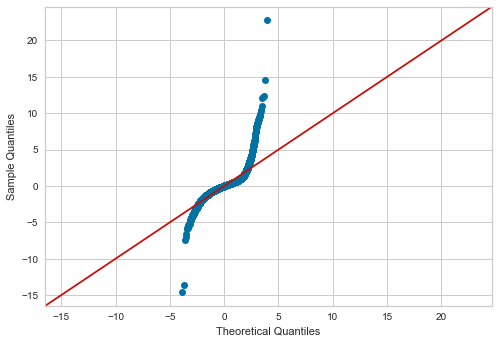

In [1343]:
import scipy.stats as stats

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
 '''
  Jarque bera test null hypothesis is normal distribution.  Test p value is statistically significant, so reject null.  
 '''

In [1344]:
'''
based on qq plot, the residuals have large ouliers on both sides
'''

'\nbased on graph the residuals have large ouliers on both sides\n'

In [1345]:
'''
homoscedasticity:The variance of residual is the same for any value of X.
'''

'\nhomoscedasticity:The variance of residual is the same for any value of X.\n'

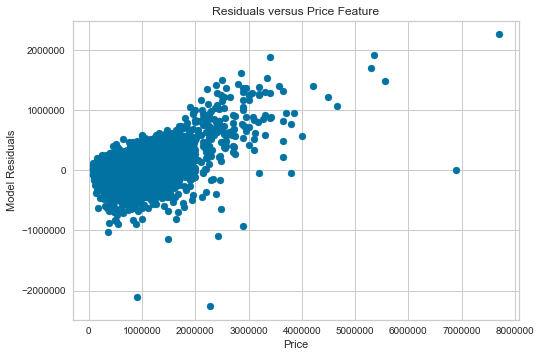

In [1584]:
lwr_thresh = data.price.quantile(q=.45)
upr_thresh = data.price.quantile(q=.55)
middle_10percent_indices = data[(data.price >= lwr_thresh) & (data.price<=upr_thresh)].index
# len(middle_10percent_indices)

indices = [x-1 for x in data.index if x not in middle_10percent_indices]
plt.scatter(data.price.iloc[indices], model.resid.iloc[indices])
plt.xlabel('Price')
plt.ylabel('Model Residuals')
plt.title("Residuals versus Price Feature")
plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

In [1585]:
import statsmodels.stats.api as sms

# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
list(zip(name, test))

[('F statistic', 0.9830282717304119), ('p-value', 0.7989370160975957)]

In [1591]:
'''
Goldfeld Quandt test null hypothesis is the variances of the residuals are not constant.

Test p value is too high, so accept null.
'''

'\nGoldfeld Quandt test null hypothesis is the variances of the errors are not constant.\n\nTest p value is too high, so accept null.\n'

In [ ]:
'''
Check residuals
'''

In [1022]:
Independant_Variables

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,3,1.00,1180,5650,1.0,0.007596,0.0,3,7,1180,1955,0.000000,98178,47.5112,-122.257,1340,5650,0.0
1,3,2.25,2570,7242,2.0,0.000000,0.0,3,7,2170,1951,1991.000000,98125,47.7210,-122.319,1690,7639,400.0
2,2,1.00,770,10000,1.0,0.000000,0.0,3,6,770,1933,83.636778,98028,47.7379,-122.233,2720,8062,0.0
3,4,3.00,1960,5000,1.0,0.000000,0.0,5,7,1050,1965,0.000000,98136,47.5208,-122.393,1360,5000,910.0
4,3,2.00,1680,8080,1.0,0.000000,0.0,3,8,1680,1987,0.000000,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.000000,0.0,3,8,1530,2009,0.000000,98103,47.6993,-122.346,1530,1509,0.0
21593,4,2.50,2310,5813,2.0,0.000000,0.0,3,8,2310,2014,0.000000,98146,47.5107,-122.362,1830,7200,0.0
21594,2,0.75,1020,1350,2.0,0.000000,0.0,3,7,1020,2009,0.000000,98144,47.5944,-122.299,1020,2007,0.0
21595,3,2.50,1600,2388,2.0,0.007596,0.0,3,8,1600,2004,0.000000,98027,47.5345,-122.069,1410,1287,0.0


In [1736]:
ContinuousX=Independant_Variables.drop(['bathrooms','bedrooms','floors','waterfront','view','condition','grade','zipcode','sqft_basement'],axis=1)
ContinuousX.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

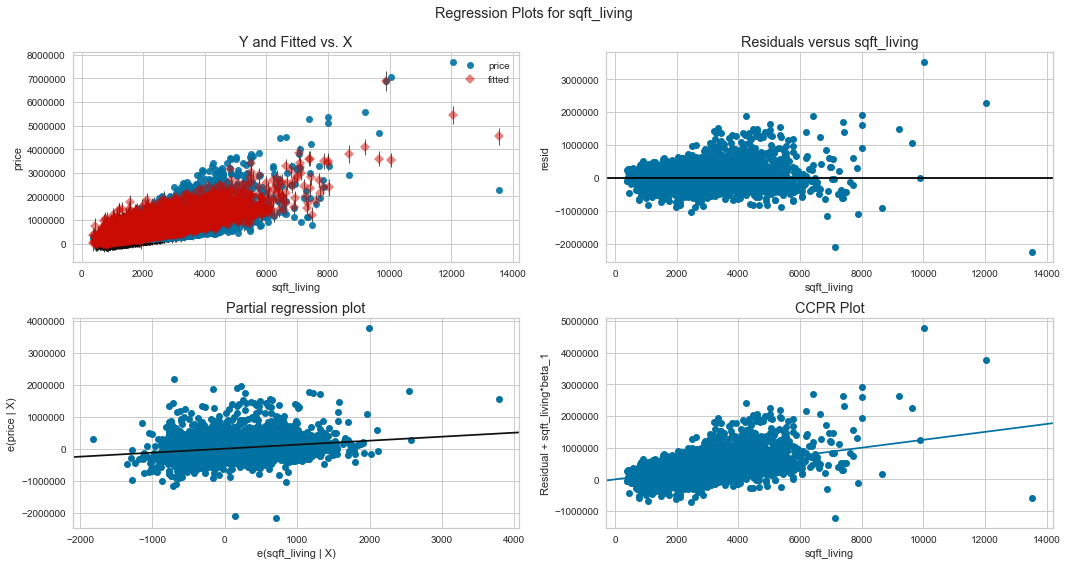

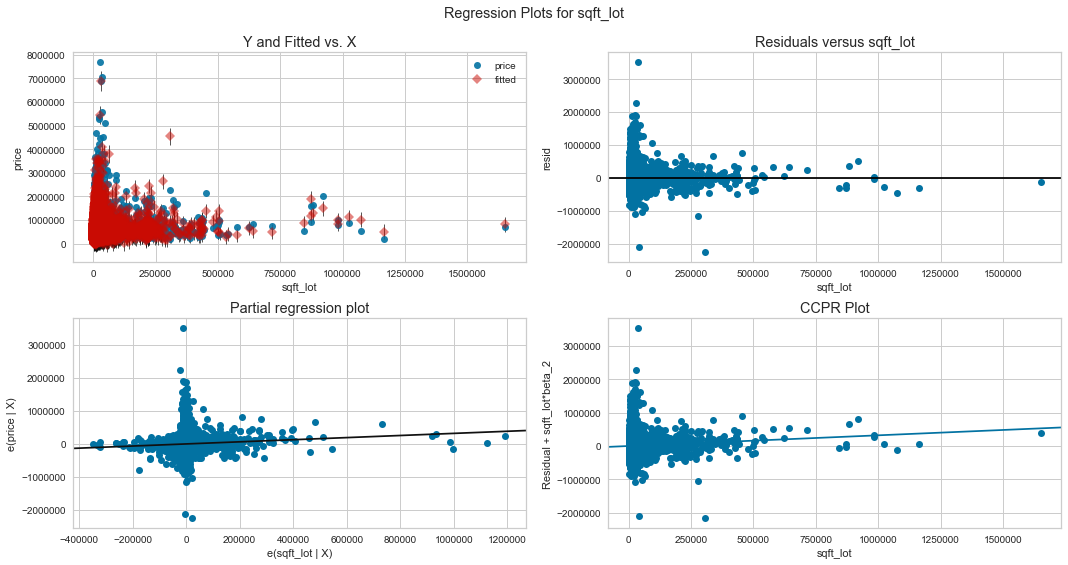

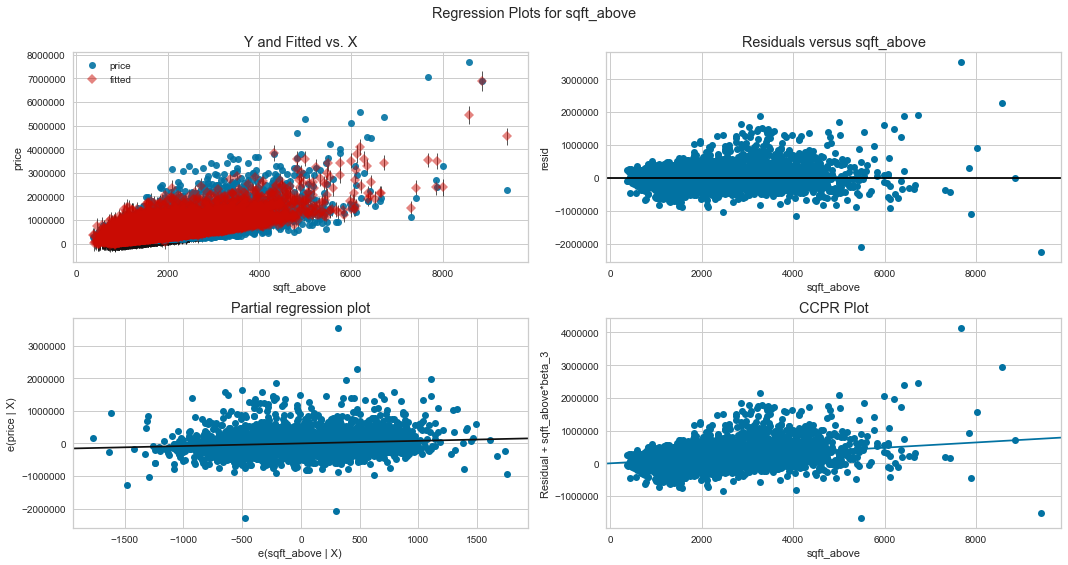

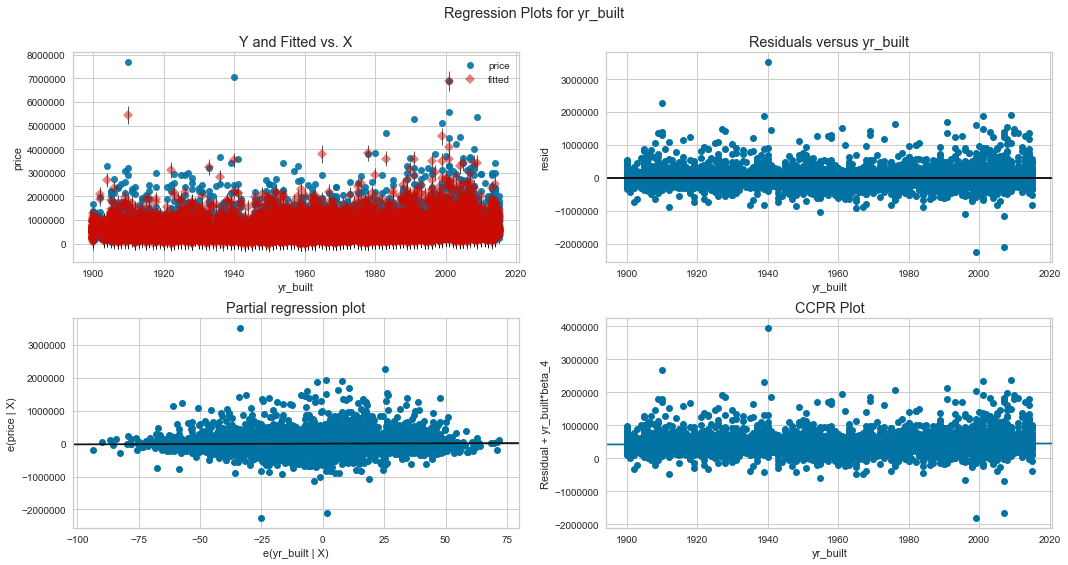

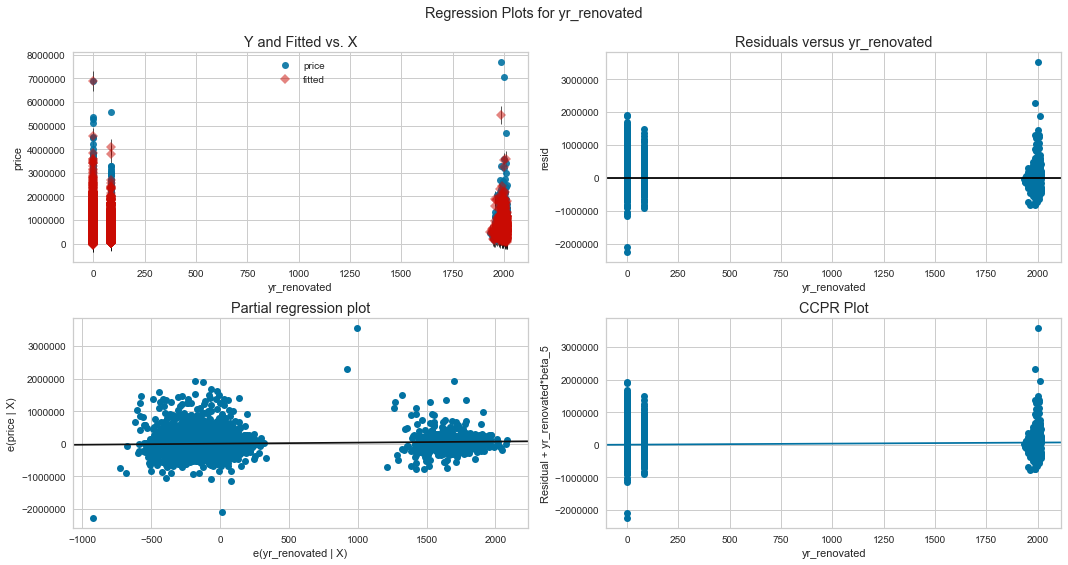

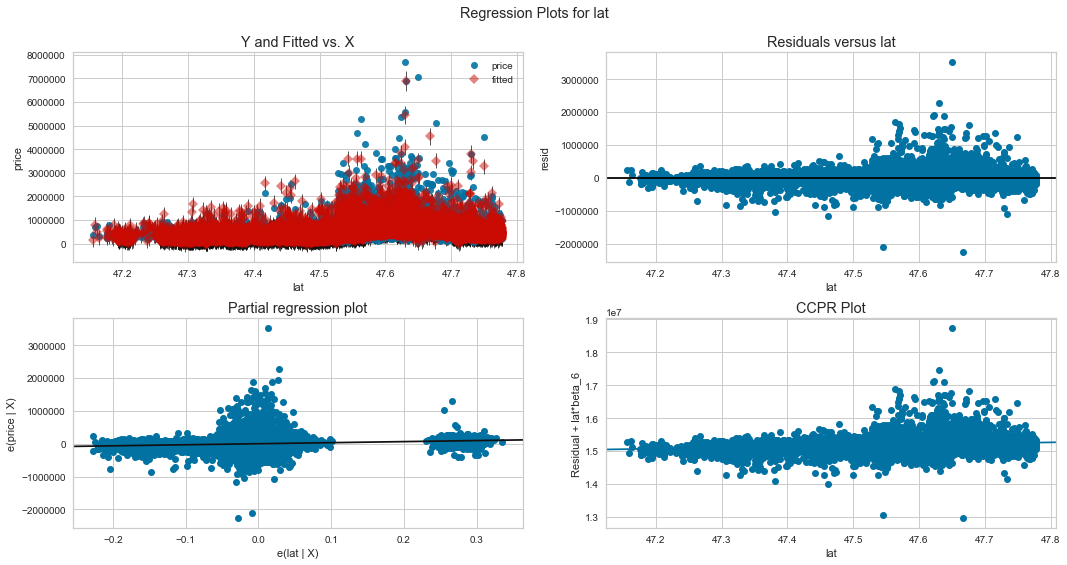

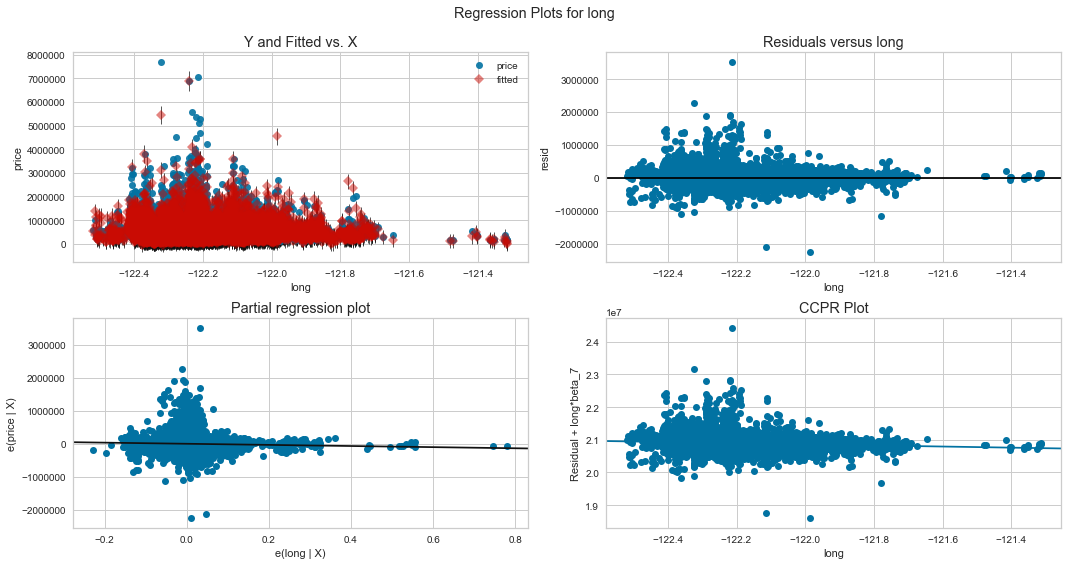

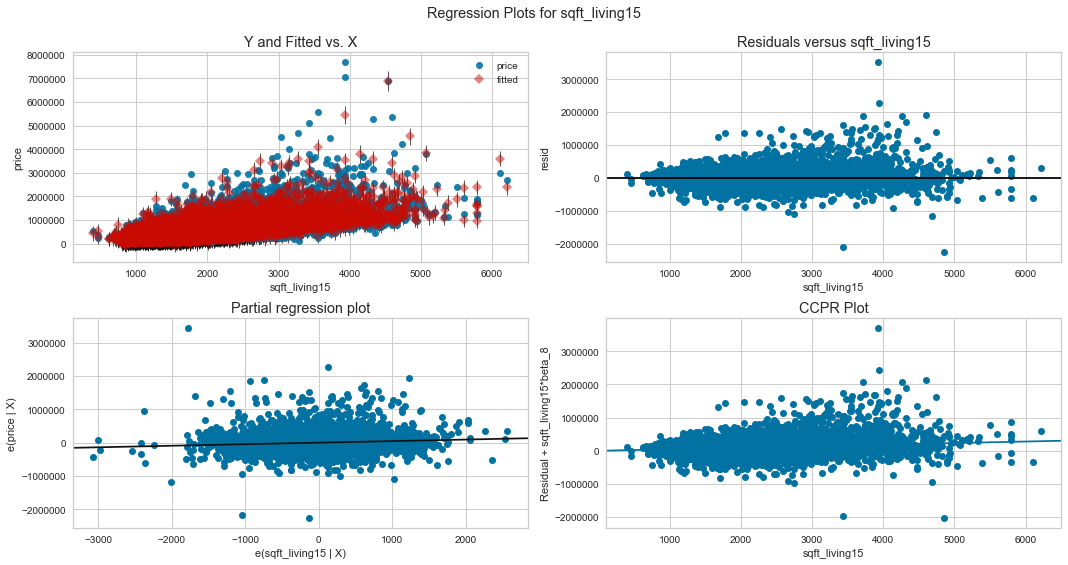

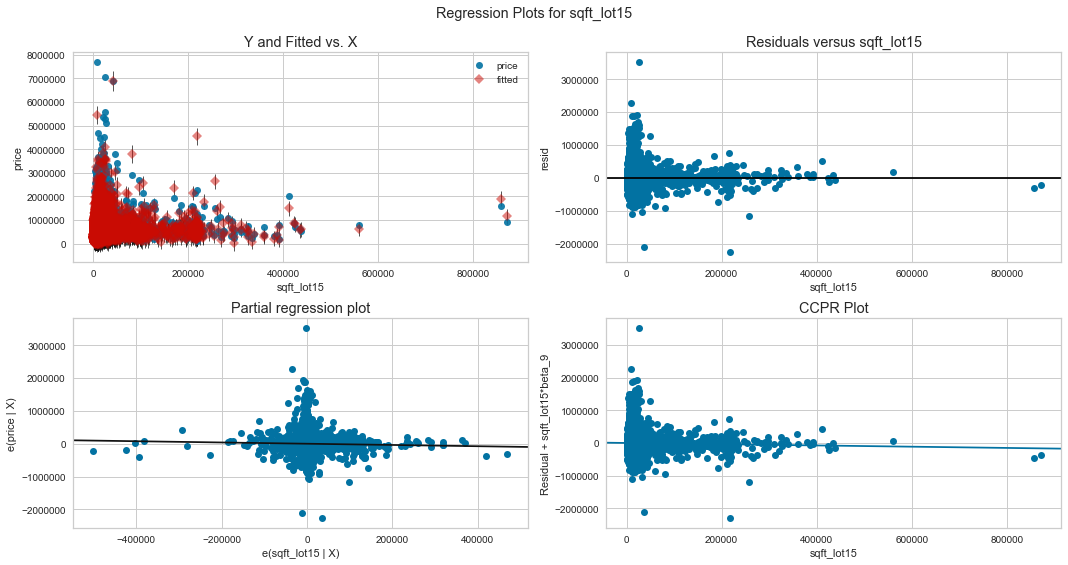

In [1980]:
for columnName in ContinuousX: 
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, f'{columnName}', fig=fig)
    plt.show()

In [ ]:
'''
Outliers
'''

In [ ]:
X2=X1

In [2171]:
X2

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms_6,...,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98198,zipcode_98199
0,1180,5650,1180,1955,0.000000,47.5112,-122.257,1340,5650,0,...,0,0,0,0,0,0,0,0,0,0
1,2570,7242,2170,1951,1991.000000,47.7210,-122.319,1690,7639,0,...,0,1,0,0,0,0,0,0,0,0
2,770,10000,770,1933,83.636778,47.7379,-122.233,2720,8062,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,1965,0.000000,47.5208,-122.393,1360,5000,0,...,0,0,0,0,1,0,0,0,0,0
4,1680,8080,1680,1987,0.000000,47.6168,-122.045,1800,7503,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,0.000000,47.6993,-122.346,1530,1509,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,2310,2014,0.000000,47.5107,-122.362,1830,7200,0,...,0,0,0,0,0,0,1,0,0,0
21594,1020,1350,1020,2009,0.000000,47.5944,-122.299,1020,2007,0,...,0,0,0,0,0,1,0,0,0,0
21595,1600,2388,1600,2004,0.000000,47.5345,-122.069,1410,1287,0,...,0,0,0,0,0,0,0,0,0,0


In [2172]:
ContinuousX

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,1180,5650,1180,1955,0.000000,47.5112,-122.257,1340,5650
1,2570,7242,2170,1951,1991.000000,47.7210,-122.319,1690,7639
2,770,10000,770,1933,83.636778,47.7379,-122.233,2720,8062
3,1960,5000,1050,1965,0.000000,47.5208,-122.393,1360,5000
4,1680,8080,1680,1987,0.000000,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,0.000000,47.6993,-122.346,1530,1509
21593,2310,5813,2310,2014,0.000000,47.5107,-122.362,1830,7200
21594,1020,1350,1020,2009,0.000000,47.5944,-122.299,1020,2007
21595,1600,2388,1600,2004,0.000000,47.5345,-122.069,1410,1287


In [1028]:
for i in ContinuousX.columns:
    print(ContinuousX[i].describe())

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64
count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64
count    21597.000000
mean        83.636778
std        362.629604
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       201

In [2173]:
list1=[]
list2=[]
list3=[]

for column in ContinuousX:
#     print(column)
    
    for i in ContinuousX[column]:
#         print(i)
#         i=int(i)
        if i < X2[f'{column}'].quantile(.25):
            list1.append(i)
            
    
        elif i > X2[f'{column}'].quantile(.75):
            list2.append(i)
            
        
        else:
            list3.append(i)
#     print(list1)
            
            
    X2[f'{column}_lower_outliers']=pd.DataFrame(list1)
    X2[f'{column}_upper_outliers']=pd.DataFrame(list2)
    X2[f'{column}1']=pd.DataFrame(list3)
    X2=X2.drop([f'{column}'],axis=1)
    

In [2176]:
X2=X2.mask(X2=='NaN').fillna(X2.mean())
X2

,bedrooms_6,bedrooms_7,bedrooms_9,bedrooms_10,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,...,lat1,long_lower_outliers,long_upper_outliers,long1,sqft_living15_lower_outliers,sqft_living15_upper_outliers,sqft_living151,sqft_lot15_lower_outliers,sqft_lot15_upper_outliers,sqft_lot151
0,0,0,0,0,0,0,0,0,0,0,...,1960.0,1180.0000,2570.000000,1960.0,1180.0000,2570.000000,1960.0,1180.0000,2570.000000,1960.0
1,0,0,0,0,0,0,0,0,0,0,...,1680.0,770.0000,5420.000000,1680.0,770.0000,5420.000000,1680.0,770.0000,5420.000000,1680.0
2,0,0,0,0,0,0,0,0,0,0,...,1715.0,1060.0000,3560.000000,1715.0,1060.0000,3560.000000,1715.0,1060.0000,3560.000000,1715.0
3,0,0,0,0,0,0,0,0,0,0,...,1780.0,1160.0000,2950.000000,1780.0,1160.0000,2950.000000,1780.0,1160.0000,2950.000000,1780.0
4,0,0,0,0,0,0,0,0,0,0,...,1890.0,1370.0000,3050.000000,1890.0,1370.0000,3050.000000,1890.0,1370.0000,3050.000000,1890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,7760.0,47.2898,83.636778,7760.0,47.2898,83.636778,7760.0,47.2898,83.636778,7760.0
21593,0,0,0,0,0,0,0,0,0,0,...,7263.0,47.4413,83.636778,7263.0,47.4413,83.636778,7263.0,47.4413,83.636778,7263.0
21594,0,0,0,0,0,0,0,0,0,0,...,5600.0,47.4413,83.636778,5600.0,47.4413,83.636778,5600.0,47.4413,83.636778,5600.0
21595,0,0,0,0,0,0,0,0,0,0,...,7001.0,47.3766,83.636778,7001.0,47.3766,83.636778,7001.0,47.3766,83.636778,7001.0


In [2179]:
import statsmodels.api as sm

predictors_int = sm.add_constant(X2)
model = sm.OLS(y,predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     481.7
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        18:46:20   Log-Likelihood:            -2.9531e+05
No. Observations:               21597   AIC:                         5.908e+05
Df Residuals:                   21504   BIC:                         5.915e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4.736e+04   4.53e+04      1.045      0.296   -4.15e+04    1.36e+05
bedrooms_6                    6.113e+04   1.32e+04      4.649      0.000    3.54e+04    8.69e+04
bedrooms_7                    1.372e+04   3.47e+04      0.395      0.693   -5.43e+04    8.17e+04
bedrooms_9                   -9.521e+04   8.68e+04     -1.097      0.273   -2.65e+05    7.49e+04
bedrooms_10                  -3.724e+05   1.23e+05     -3.019      0.003   -6.14e+05   -1.31e+05
bathrooms_4.25                2.407e+05    1.2e+04     20.022      0.000    2.17e+05    2.64e+05
bathrooms_4.5                 4.193e+05   2.16e+04     19.453      0.000    3.77e+05    4.62e+05
bathrooms_4.75                 7.98e+05   4.44e+04     17.970      0.000    7.11e+05    8.85e+05
bathrooms_5.0                 5.074e+05   4.65e+04     10.923      0.000    4.16e+05    5.98e+05
bathrooms_5.25                5.186e+05   5.98e+04      8.674      0.000    4.01e+05    6.36e+05
bathrooms_5.5                 9.592e+05   6.84e+04     14.029      0.000    8.25e+05    1.09e+06
bathrooms_6.0                 8.718e+05   8.85e+04      9.852      0.000    6.98e+05    1.05e+06
bathrooms_6.25                1.264e+06   1.53e+05      8.279      0.000    9.65e+05    1.56e+06
bathrooms_6.75                2.407e+05    1.2e+04     20.022      0.000    2.17e+05    2.64e+05
bathrooms_7.75                 2.71e+06   2.23e+05     12.154      0.000    2.27e+06    3.15e+06
bathrooms_8.0                 2.402e+06   1.55e+05     15.510      0.000     2.1e+06    2.71e+06
floors_2.0                    1.402e+05   3405.592     41.159      0.000    1.33e+05    1.47e+05
floors_2.5                    3.112e+05   1.71e+04     18.220      0.000    2.78e+05    3.45e+05
floors_3.0                   -3032.1669   9474.656     -0.320      0.749   -2.16e+04    1.55e+04
waterfront_1.0                5.923e+05   2.17e+04     27.306      0.000     5.5e+05    6.35e+05
view_0.23386272870808952      7.886e+04   2.67e+04      2.958      0.003    2.66e+04    1.31e+05
view_1.0                      2.153e+05   1.19e+04     18.171      0.000    1.92e+05    2.39e+05
view_2.0                      2.017e+05   7097.026     28.424      0.000    1.88e+05    2.16e+05
view_.0                       3.526e+05   9663.457     36.487      0.000    3.34e+05    3.72e+05
view_4.0                      5.283e+05   1.49e+04     35.575      0.000    4.99e+05    5.57e+05
condition_2                   1.128e+05   4.24e+04      2.664      0.008    2.98e+04    1.96e+05
condition_3                     1.8e+05   3.92e+04      4.589      0.000    1.03e+05    2.57e+05
condition_4                   1.855e+05   3.92e+04      4.725      0.000    1.09e+05    2.62e+05
condition_5                   2.568e+05   3.95e+04      6.504      0.000    

In [150]:
'''
Multicolinearity
'''

'\nMulticolinearity\n'

In [ ]:
'''
Durbin Watson test null hypothesis is uncorrelation.  Test is 1.9, and need 2 to reject the null.  
'''

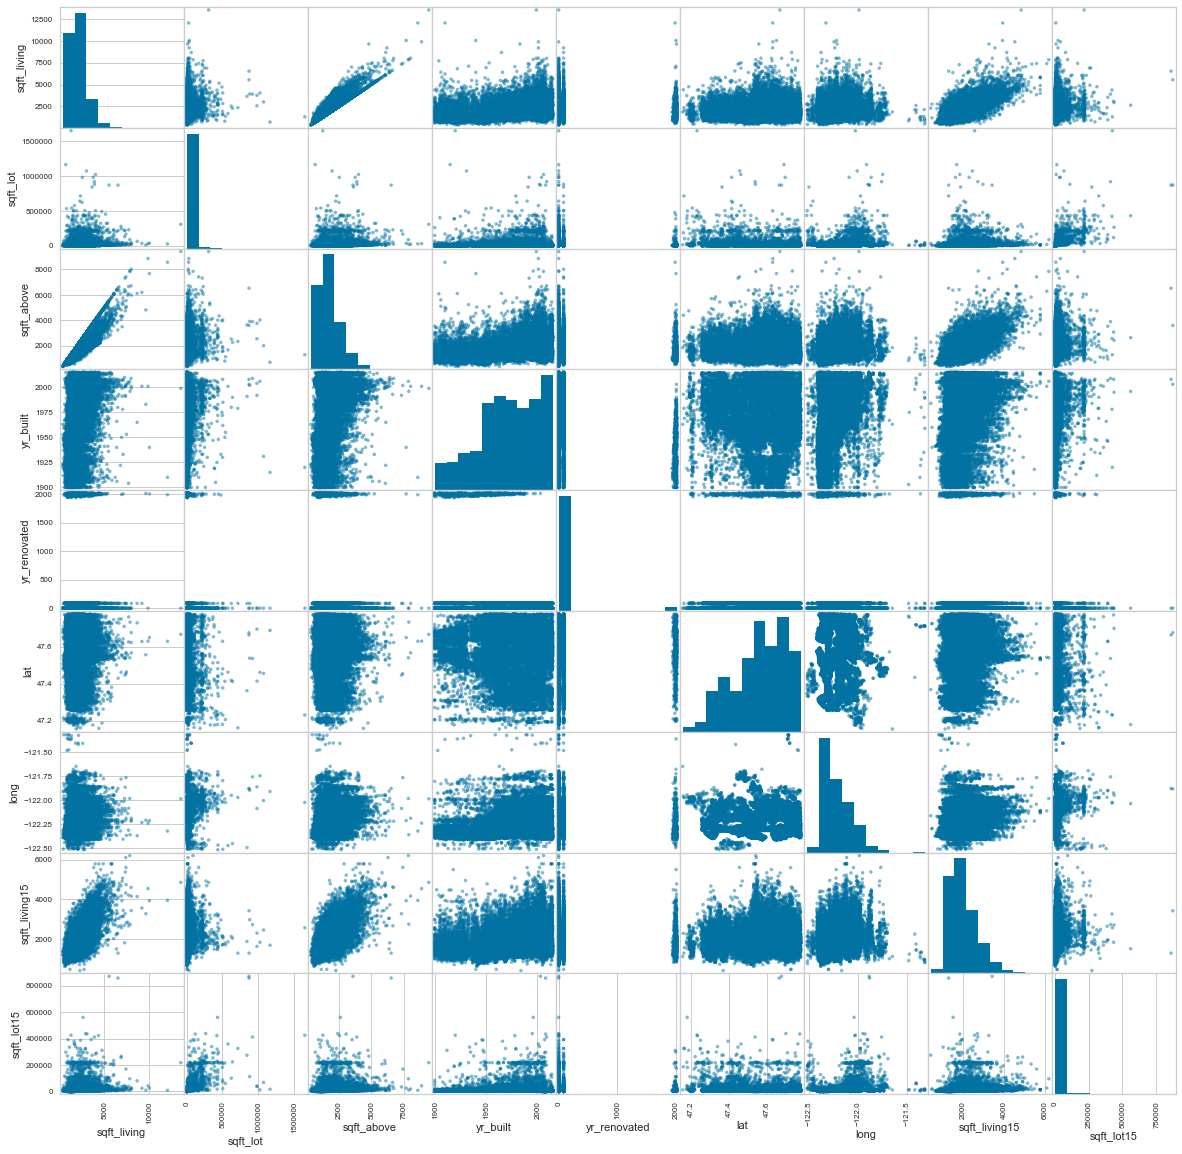

In [1982]:
pd.plotting.scatter_matrix(ContinuousX,figsize  = [20, 20]);
plt.show()

In [1983]:
abs(ContinuousX.corr())

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
sqft_living,1.000000,0.173453,0.876448,0.318152,0.050438,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.173453,1.000000,0.184139,0.052946,0.004161,0.085514,0.230227,0.144763,0.718204
sqft_above,0.876448,0.184139,1.000000,0.424037,0.020045,0.001199,0.344842,0.731767,0.195077
yr_built,0.318152,0.052946,0.424037,1.000000,0.204040,0.148370,0.409993,0.326377,0.070777
yr_renovated,0.050438,0.004161,0.020045,0.204040,1.000000,0.029143,0.065497,0.000224,0.003550
lat,0.052155,0.085514,0.001199,0.148370,0.029143,1.000000,0.135371,0.048679,0.086139
long,0.241214,0.230227,0.344842,0.409993,0.065497,0.135371,1.000000,0.335626,0.255586
sqft_living15,0.756402,0.144763,0.731767,0.326377,0.000224,0.048679,0.335626,1.000000,0.183515
sqft_lot15,0.184342,0.718204,0.195077,0.070777,0.003550,0.086139,0.255586,0.183515,1.000000


In [1475]:
'''
Interactions
'''

'\nInteractions\n'

In [2180]:
Independent_Variables=Independent_Variables.drop(['date'],axis=1)

In [ ]:
'''
Nested for loop to make all samples of interaction combinations.  
'''

In [1715]:

for column in Independant_Variables:
    for columns in Independant_Variables:
        model_interaction = smf.ols(formula=f'price ~ {column} + {columns} + {column}:{columns}', data=data).fit()
        summary = model_interaction.summary()
        print(summary)
        

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.0

In [2225]:
X_interact = pd.DataFrame()

X_interact['bedrooms_bathrooms'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['bathrooms'].astype('int64')
X_interact['bedrooms_sqft_living'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['sqft_living'].astype('int64')
# X_interact['bedrooms_sqft_lot '] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['sqft_lot '].astype('int64'), sqft_lot has high p value
X_interact['bedrooms_floors'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['floors'].astype('int64')
X_interact['bedrooms_waterfront'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['waterfront'].astype('int64')
X_interact['bedrooms_view'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['view'].astype('int64')
X_interact['bedrooms_condition'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['condition'].astype('int64')
X_interact['bedrooms_grade'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['grade'].astype('int64')
X_interact['bedrooms_sqft_above'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['bedrooms_yr_built'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
# X_interact['bedrooms_yr_renovated '] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['yr_renovated '].astype('int64')
X_interact['bedrooms_zipcode'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['bedrooms_lat'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['bedrooms_long'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['bedrooms_sqft_living15'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['bedrooms_sqft_lot15'] = Independant_Variables['bedrooms'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['bathrooms_sqft_living'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_living'].astype('int64')
X_interact['bathrooms_sqft_lot'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_lot'].astype('int64')
X_interact['bathrooms_floors'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['floors'].astype('int64')
X_interact['bathrooms_view'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['view'].astype('int64')
# X_interact['bathrooms_sqft_condition'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_condition'].astype('int64')
X_interact['bathrooms_sqft_above'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['bathrooms_yr_built'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['bathrooms_yr_renovated'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['yr_renovated'].astype('int64')
X_interact['bathrooms_zipcode'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
# X_interact['bathrooms_lat'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['bathrooms_long'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['bathrooms_sqft_living15'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['bathrooms_sqft_lot15'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['bathrooms_sqft_basement'] = Independant_Variables['bathrooms'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
# X_interact['sqft_living_sqft_lot'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['sqft_lot'].astype('int64')
X_interact['sqft_living_floors'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['floors'].astype('int64')
X_interact['sqft_living_waterfront'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['waterfront'].astype('int64')
X_interact['sqft_living_view'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['view'].astype('int64')
X_interact['sqft_living_condition'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['condition'].astype('int64')
X_interact['sqft_living_grade'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['grade'].astype('int64')
X_interact['sqft_living_sqft_above'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['sqft_living_yr_built'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['sqft_living_yr_renovated'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['yr_renovated'].astype('int64')
X_interact['sqft_living_zipcode'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
# X_interact['sqft_living_lat'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['lat'].astype('int64')
# X_interact['sqft_living_long'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['sqft_living_sqft_living15'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['sqft_living_sqft_basement'] = Independant_Variables['sqft_living'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['sqft_lot_floors'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['floors'].astype('int64')
X_interact['sqft_lot_waterfront'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['waterfront'].astype('int64')
X_interact['sqft_lot_view'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['view'].astype('int64')
X_interact['sqft_lot_condition'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['condition'].astype('int64')
X_interact['sqft_lot_yr_built'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['sqft_lot_zipcode'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['zipcode'].astype('int64')\
# X_interact['sqft_lot_lat'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['lat'].astype('int64')
# X_interact['sqft_lot_long'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['sqft_lot_sqft_living15'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['sqft_lot_sqft_lot15'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['sqft_lot_sqft_basement'] = Independant_Variables['sqft_lot'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['floors_waterfront'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['waterfront'].astype('int64')
X_interact['floors_view'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['view'].astype('int64')
X_interact['floors_condition'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['condition'].astype('int64')
X_interact['floors_grade'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['grade'].astype('int64')
X_interact['floors_sqft_above'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['floors_yr_built'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
# X_interact['floors_yr_renovated'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['yr_renovated'].astype('int64')
X_interact['floors_lat'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['floors_long'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['floors_sqft_lot15'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['floors_sqft_basement'] = Independant_Variables['floors'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['waterfront_view'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['view'].astype('int64')
X_interact['waterfront_condition'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['condition'].astype('int64')
X_interact['waterfront_grade'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['grade'].astype('int64')
X_interact['waterfront_sqft_above'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['waterfront_yr_built'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['waterfront_yr_renovated'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['yr_renovated'].astype('int64')
X_interact['waterfront_zipcode'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['waterfront_lat'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['waterfront_long'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['waterfront_sqft_living15'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['waterfront_sqft_lot15'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['waterfront_sqft_basement'] = Independant_Variables['waterfront'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['view_grade'] = Independant_Variables['view'].astype('int64') * Independant_Variables['grade'].astype('int64')
# X_interact['view_sqft_above'] = Independant_Variables['view'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['view_yr_built'] = Independant_Variables['view'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['view_yr_renovated'] = Independant_Variables['view'].astype('int64') * Independant_Variables['yr_renovated'].astype('int64')
X_interact['view_zipcode'] = Independant_Variables['view'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['view_lat'] = Independant_Variables['view'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['view_sqft_living15'] = Independant_Variables['view'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['view_sqft_lot15'] = Independant_Variables['view'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['view_sqft_basement'] = Independant_Variables['view'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['condition_grade'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['grade'].astype('int64')
X_interact['condition_sqft_above'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['condition_yr_built'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['condition_zipcode'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['condition_lat'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['condition_long'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['condition_sqft_living15'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['condition_sqft_lot15'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['condition_sqft_basement'] = Independant_Variables['condition'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['grade_sqft_above'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['grade_yr_renovated'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['grade_zipcode'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['grade_lat'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['grade_long'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['grade_sqft_living15'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['grade_sqft_basement'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['grade_sqft_above'] = Independant_Variables['grade'].astype('int64') * Independant_Variables['sqft_above'].astype('int64')
X_interact['sqft_above_yr_built'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['yr_built'].astype('int64')
X_interact['sqft_above_yr_renovated'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['yr_renovated'].astype('int64')
X_interact['sqft_above_zipcode'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['sqft_above_lat'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['lat'].astype('int64')
# X_interact['sqft_above_long'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['sqft_above_sqft_living15'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['sqft_above_sqft_lot15'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['sqft_above_sqft_basement'] = Independant_Variables['sqft_above'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['yr_built_zipcode'] = Independant_Variables['yr_built'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['yr_built_lat'] = Independant_Variables['yr_built'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['yr_built_long'] = Independant_Variables['yr_built'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['yr_built_sqft_living15'] = Independant_Variables['yr_built'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['yr_built_sqft_lot15'] = Independant_Variables['yr_built'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['yr_built_sqft_basement'] = Independant_Variables['yr_built'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['yr_renovated_zipcode'] = Independant_Variables['yr_renovated'].astype('int64') * Independant_Variables['zipcode'].astype('int64')
X_interact['yr_renovated_lat'] = Independant_Variables['yr_renovated'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['yr_renovated_long'] = Independant_Variables['yr_renovated'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['yr_renovated_sqft_living15'] = Independant_Variables['yr_renovated'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['yr_renovated_sqft_basement'] = Independant_Variables['yr_renovated'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['zipcode_lat'] = Independant_Variables['zipcode'].astype('int64') * Independant_Variables['lat'].astype('int64')
X_interact['zipcode_long'] = Independant_Variables['zipcode'].astype('int64') * Independant_Variables['long'].astype('int64')
X_interact['zipcode_sqft_living15'] = Independant_Variables['zipcode'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['zipcode_sqft_lot15'] = Independant_Variables['zipcode'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
# X_interact['lat_sqft_living15'] = Independant_Variables['lat'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['lat_sqft_basement'] = Independant_Variables['lat'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['lat_sqft_living15'] = Independant_Variables['lat'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
X_interact['long_sqft_living15'] = Independant_Variables['long'].astype('int64') * Independant_Variables['sqft_living15'].astype('int64')
# X_interact['long_sqft_lot15'] = Independant_Variables['long'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['long_sqft_basement'] = Independant_Variables['long'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['sqft_living15_sqft_lot15'] = Independant_Variables['sqft_living15'].astype('int64') * Independant_Variables['sqft_lot15'].astype('int64')
X_interact['sqft_living15_sqft_basement'] = Independant_Variables['sqft_living15'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')
X_interact['sqft_lot15_sqft_basement'] = Independant_Variables['sqft_lot15'].astype('int64') * Independant_Variables['sqft_basement'].astype('int64')


In [318]:
X_interact.columns

Index(['bedrooms_bathrooms', 'bedrooms_sqft_living', 'bedrooms_floors',
       'bedrooms_waterfront', 'bedrooms_view', 'bedrooms_condition',
       'bedrooms_grade', 'bedrooms_sqft_above', 'bedrooms_yr_built',
       'bedrooms_zipcode',
       ...
       'zipcode_long', 'zipcode_sqft_living15', 'zipcode_sqft_lot15',
       'lat_sqft_basement', 'lat_sqft_living15', 'long_sqft_living15',
       'long_sqft_basement', 'sqft_living15_sqft_lot15',
       'sqft_living15_sqft_basement', 'sqft_lot15_sqft_basement'],
      dtype='object', length=121)

In [2226]:
X1

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms_6,...,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98198,zipcode_98199
0,1180,5650,1180,1955,0.000000,47.5112,-122.257,1340,5650,0,...,0,0,0,0,0,0,0,0,0,0
1,2570,7242,2170,1951,1991.000000,47.7210,-122.319,1690,7639,0,...,0,1,0,0,0,0,0,0,0,0
2,770,10000,770,1933,83.636778,47.7379,-122.233,2720,8062,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,1050,1965,0.000000,47.5208,-122.393,1360,5000,0,...,0,0,0,0,1,0,0,0,0,0
4,1680,8080,1680,1987,0.000000,47.6168,-122.045,1800,7503,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,0.000000,47.6993,-122.346,1530,1509,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,2310,2014,0.000000,47.5107,-122.362,1830,7200,0,...,0,0,0,0,0,0,1,0,0,0
21594,1020,1350,1020,2009,0.000000,47.5944,-122.299,1020,2007,0,...,0,0,0,0,0,1,0,0,0,0
21595,1600,2388,1600,2004,0.000000,47.5345,-122.069,1410,1287,0,...,0,0,0,0,0,0,0,0,0,0


In [2227]:
X3 = pd.concat([X1,X_interact], axis=1)
X3

,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms_6,...,zipcode_long,zipcode_sqft_living15,zipcode_sqft_lot15,lat_sqft_basement,lat_sqft_living15,long_sqft_living15,long_sqft_basement,sqft_living15_sqft_lot15,sqft_living15_sqft_basement,sqft_lot15_sqft_basement
0,1180,5650,1180,1955,0.000000,47.5112,-122.257,1340,5650,0,...,-11977716,131558520,554705700,0,62980,-163480,0,7571000,0,0
1,2570,7242,2170,1951,1991.000000,47.7210,-122.319,1690,7639,0,...,-11971250,165831250,749576875,18800,79430,-206180,-48800,12909910,676000,3055600
2,770,10000,770,1933,83.636778,47.7379,-122.233,2720,8062,0,...,-11959416,266636160,790301736,0,127840,-331840,0,21928640,0,0
3,1960,5000,1050,1965,0.000000,47.5208,-122.393,1360,5000,0,...,-11972592,133464960,490680000,42770,63920,-165920,-111020,6800000,1237600,4550000
4,1680,8080,1680,1987,0.000000,47.6168,-122.045,1800,7503,0,...,-11965028,176533200,735849222,0,84600,-219600,0,13505400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,2009,0.000000,47.6993,-122.346,1530,1509,0,...,-11968566,150097590,148037427,0,71910,-186660,0,2308770,0,0
21593,2310,5813,2310,2014,0.000000,47.5107,-122.362,1830,7200,0,...,-11973812,179607180,706651200,0,86010,-223260,0,13176000,0,0
21594,1020,1350,1020,2009,0.000000,47.5944,-122.299,1020,2007,0,...,-11973568,100106880,196975008,0,47940,-124440,0,2047140,0,0
21595,1600,2388,1600,2004,0.000000,47.5345,-122.069,1410,1287,0,...,-11959294,138218070,126160749,0,66270,-172020,0,1814670,0,0


In [2228]:
X3['sqft_living_upper_outliers']=X2['sqft_living_upper_outliers']

In [2229]:
import statsmodels.api as sm
X3=X3.astype(float)
X3 = sm.add_constant(X3)
model = sm.OLS(y,X3)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     750.0
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        19:08:57   Log-Likelihood:            -2.8483e+05
No. Observations:               21597   AIC:                         5.701e+05
Df Residuals:                   21394   BIC:                         5.717e+05
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          66.5069      8.925      7.452      0.000      49.013      84.001
sqft_living                  1240.4621   5479.435      0.226      0.821   -9499.641     1.2e+04
sqft_lot                      153.3249    146.064      1.050      0.294    -132.972     439.622
sqft_above                      9.4665      2.558      3.701      0.000       4.453      14.480
yr_built                       66.3840     14.826      4.477      0.000      37.323      95.445
yr_renovated                 3117.7586   3647.335      0.855      0.393   -4031.291    1.03e+04
lat                          3.221e+05    1.2e+04     26.850      0.000    2.99e+05    3.46e+05
long                        -1.666e+05   2.25e+04     -7.404      0.000   -2.11e+05   -1.23e+05
sqft_living15                 -11.8694      2.248     -5.280      0.000     -16.275      -7.464
sqft_lot15                   -249.7305    194.016     -1.287      0.198    -630.017     130.556
bedrooms_6                  -1643.6654   9468.416     -0.174      0.862   -2.02e+04    1.69e+04
bedrooms_7                  -3.752e+04   2.36e+04     -1.589      0.112   -8.38e+04    8757.839
bedrooms_9                  -2.072e+04   6.02e+04     -0.344      0.731   -1.39e+05    9.72e+04
bedrooms_10                 -5.247e+04   8.04e+04     -0.652      0.514    -2.1e+05    1.05e+05
bathrooms_4.25               7284.4862   8049.358      0.905      0.365   -8492.857    2.31e+04
bathrooms_4.5                -3.36e+04   1.46e+04     -2.305      0.021   -6.22e+04   -5022.900
bathrooms_4.75               1.086e+05   2.86e+04      3.793      0.000    5.25e+04    1.65e+05
bathrooms_5.0               -4366.6517   3.12e+04     -0.140      0.889   -6.55e+04    5.67e+04
bathrooms_5.25              -1.757e+04   3.88e+04     -0.452      0.651   -9.37e+04    5.85e+04
bathrooms_5.5                9095.7476    4.9e+04      0.186      0.853   -8.69e+04    1.05e+05
bathrooms_6.0                2.783e+05    6.1e+04      4.563      0.000    1.59e+05    3.98e+05
bathrooms_6.25              -2.828e+04   1.02e+05     -0.276      0.782   -2.29e+05    1.72e+05
bathrooms_6.75               7284.4304   8049.357      0.905      0.365   -8492.912    2.31e+04
bathrooms_7.75               1.876e+06   1.54e+05     12.152      0.000    1.57e+06    2.18e+06
bathrooms_8.0                9.517e+05   1.52e+05      6.245      0.000    6.53e+05    1.25e+06
floors_2.0                   5175.1492   2.51e+04      0.206      0.837    -4.4e+04    5.43e+04
floors_2.5                   1.073e+04   2.71e+04      0.397      0.692   -4.23e+04    6.38e+04
floors_3.0                   2.047e+04      5e+04      0.410      0.682   -7.75e+04    1.18e+05
waterfront_1.0               1.575e+04   1306.841     12.049      0.000    1.32e+04    1.83e+04
view_0.2338

In [675]:
X3=X3.drop(['sqft_living_upper_outliers','sqft_living','sqft_lot','sqft_lot15','bedrooms_6','bedrooms_7','bedrooms_9','bedrooms_10','bathrooms_4.25','bathrooms_5.0','bathrooms_5.25','bathrooms_5.25','bathrooms_5.5','bathrooms_6.25','bathrooms_6.75','floors_2.0','floors_2.5','floors_3.0','view_0.23386272870808952','condition_2','condition_3','condition_4','condition_5','zipcode_98070','zipcode_98077','zipcode_98198','yr_renovated','bedrooms_waterfront','bedrooms_view','bedrooms_condition','bedrooms_condition','bedrooms_grade','bedrooms_yr_built','bedrooms_zipcode','bedrooms_lat','bedrooms_long','bedrooms_sqft_living15','bedrooms_sqft_lot15','bathrooms_sqft_living','bathrooms_yr_built','bathrooms_sqft_living15','bathrooms_sqft_basement','sqft_living_floors','sqft_living_condition','sqft_living_grade','sqft_living_yr_built','sqft_living_zipcode','sqft_living_sqft_living15','sqft_lot_floors','sqft_lot_waterfront','sqft_lot_waterfront','sqft_lot_view','sqft_lot_condition','sqft_lot_zipcode','sqft_lot_sqft_living15','sqft_lot_sqft_basement','floors_view','floors_grade','floors_sqft_lot15','floors_sqft_basement','waterfront_condition','waterfront_yr_built','view_zipcode','view_lat','view_sqft_basement','condition_grade','condition_sqft_above','condition_sqft_basement','grade_sqft_above','grade_yr_renovated','grade_sqft_living15','grade_sqft_basement','sqft_above_yr_built','sqft_above_sqft_living15','yr_built_sqft_basement','yr_renovated_zipcode','yr_renovated_lat','yr_renovated_long','zipcode_sqft_lot15','lat_sqft_basement','sqft_living15_sqft_basement','sqft_lot15_sqft_basement'],axis=1)
X3.columns

Index(['const', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_6.0', 'bathrooms_7.75',
       ...
       'yr_built_sqft_lot15', 'yr_renovated_sqft_living15',
       'yr_renovated_sqft_basement', 'zipcode_lat', 'zipcode_long',
       'zipcode_sqft_living15', 'lat_sqft_living15', 'long_sqft_living15',
       'long_sqft_basement', 'sqft_living15_sqft_lot15'],
      dtype='object', length=134)

In [676]:
import statsmodels.api as sm
X3=X3.astype(float)
X3 = sm.add_constant(X3)
model = sm.OLS(y,X3)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1103.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        16:52:24   Log-Likelihood:            -2.8560e+05
No. Observations:               21597   AIC:                         5.714e+05
Df Residuals:                   21469   BIC:                         5.725e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1100.2412    185.866     -5.920      0.000   -1464.552    -735.930
sqft_above                   -40.5576      4.404     -9.210      0.000     -49.189     -31.926
yr_built                      64.8276     13.834      4.686      0.000      37.712      91.943
lat                         3.171e+05   1.14e+04     27.720      0.000    2.95e+05     3.4e+05
long                       -1.479e+05   2.03e+04     -7.269      0.000   -1.88e+05   -1.08e+05
sqft_living15                -15.5916      2.119     -7.357      0.000     -19.746     -11.437
bathrooms_4.5              -3.259e+04   1.45e+04     -2.249      0.025    -6.1e+04   -4184.721
bathrooms_4.75              1.102e+05    2.9e+04      3.800      0.000    5.34e+04    1.67e+05
bathrooms_6.0                2.64e+05   6.05e+04      4.365      0.000    1.45e+05    3.83e+05
bathrooms_7.75              1.084e+06   1.49e+05      7.265      0.000    7.92e+05    1.38e+06
bathrooms_8.0              -7.163e+05   1.27e+05     -5.630      0.000   -9.66e+05   -4.67e+05
waterfront_1.0              1.575e+04   1178.683     13.360      0.000    1.34e+04    1.81e+04
view_1.0                    7.166e+05   1.05e+05      6.806      0.000     5.1e+05    9.23e+05
view_2.0                    1.336e+06    2.1e+05      6.368      0.000    9.25e+05    1.75e+06
view_.0                     2.036e+06   3.15e+05      6.474      0.000    1.42e+06    2.65e+06
view_4.0                    2.784e+06   4.19e+05      6.647      0.000    1.96e+06     3.6e+06
grade_12                    2.192e+05   1.68e+04     13.031      0.000    1.86e+05    2.52e+05
grade_13                    7.344e+05   4.35e+04     16.895      0.000    6.49e+05     8.2e+05
zipcode_98004               6.728e+05   8821.498     76.271      0.000    6.56e+05     6.9e+05
zipcode_98005               2.497e+05   1.12e+04     22.208      0.000    2.28e+05    2.72e+05
zipcode_98006               2.039e+05   7412.032     27.512      0.000    1.89e+05    2.18e+05
zipcode_98007               1.851e+05   1.19e+04     15.545      0.000    1.62e+05    2.08e+05
zipcode_98008               1.803e+05   8891.711     20.278      0.000    1.63e+05    1.98e+05
zipcode_98010               1.021e+05   1.43e+04      7.119      0.000     7.4e+04     1.3e+05
zipcode_98014               2.983e+04   1.46e+04      2.048      0.041    1277.371    5.84e+04
zipcode_98022               7.231e+04   1.11e+04      6.525      0.000    5.06e+04     9.4e+04
zipcode_98023              -4.359e+04   7392.299     -5.897      0.000   -5.81e+04   -2.91e+04
zipcode_98024               1.621e+05   1.71e+04      9.482      0.000    1.29e+05    1.96e+05
zipcode_98027               1.443e+05   7670.894     18.809      0.000    1.29e+05    1.59e+05
zipcode_98029                1.78e+05   886

In [677]:
X3=X3.drop(['bedrooms_sqft_living','bathrooms_sqft_lot15','floors_condition','waterfront_view','waterfront_sqft_above','view_yr_renovated','grade_zipcode','grade_lat','sqft_above_zipcode','sqft_above_lat','yr_renovated_sqft_living15','long_sqft_basement'],axis=1)
X3.columns

Index(['const', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_6.0', 'bathrooms_7.75',
       ...
       'yr_built_long', 'yr_built_sqft_living15', 'yr_built_sqft_lot15',
       'yr_renovated_sqft_basement', 'zipcode_lat', 'zipcode_long',
       'zipcode_sqft_living15', 'lat_sqft_living15', 'long_sqft_living15',
       'sqft_living15_sqft_lot15'],
      dtype='object', length=122)

In [678]:
import statsmodels.api as sm
X3=X3.astype(float)
X3 = sm.add_constant(X3)
model = sm.OLS(y,X3)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1207.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        16:52:28   Log-Likelihood:            -2.8561e+05
No. Observations:               21597   AIC:                         5.714e+05
Df Residuals:                   21480   BIC:                         5.724e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1112.9207    174.167     -6.390      0.000   -1454.301    -771.541
sqft_above                    29.0164      8.823      3.289      0.001      11.723      46.309
yr_built                     -17.4419     14.945     -1.167      0.243     -46.736      11.852
lat                         3.193e+05   1.14e+04     27.977      0.000    2.97e+05    3.42e+05
long                       -1.476e+05   2.03e+04     -7.263      0.000   -1.87e+05   -1.08e+05
sqft_living15                 -8.2888      1.767     -4.690      0.000     -11.753      -4.825
bathrooms_4.5              -3.277e+04   1.45e+04     -2.263      0.024   -6.12e+04   -4389.000
bathrooms_4.75              1.095e+05    2.9e+04      3.782      0.000    5.28e+04    1.66e+05
bathrooms_6.0               2.741e+05   5.88e+04      4.664      0.000    1.59e+05    3.89e+05
bathrooms_7.75              1.099e+06   1.49e+05      7.386      0.000    8.07e+05    1.39e+06
bathrooms_8.0              -7.654e+05   1.19e+05     -6.449      0.000   -9.98e+05   -5.33e+05
waterfront_1.0              1.574e+04   1169.512     13.456      0.000    1.34e+04     1.8e+04
view_1.0                    7.001e+05      1e+05      6.972      0.000    5.03e+05    8.97e+05
view_2.0                    1.303e+06      2e+05      6.516      0.000    9.11e+05     1.7e+06
view_.0                     1.987e+06      3e+05      6.630      0.000     1.4e+06    2.57e+06
view_4.0                    2.715e+06   3.99e+05      6.805      0.000    1.93e+06     3.5e+06
grade_12                    2.159e+05   1.67e+04     12.937      0.000    1.83e+05    2.49e+05
grade_13                    7.193e+05   4.27e+04     16.862      0.000    6.36e+05    8.03e+05
zipcode_98004               6.724e+05   8779.466     76.587      0.000    6.55e+05     6.9e+05
zipcode_98005               2.485e+05   1.12e+04     22.161      0.000    2.27e+05     2.7e+05
zipcode_98006               2.025e+05   7355.260     27.536      0.000    1.88e+05    2.17e+05
zipcode_98007               1.846e+05   1.19e+04     15.532      0.000    1.61e+05    2.08e+05
zipcode_98008               1.795e+05   8876.833     20.218      0.000    1.62e+05    1.97e+05
zipcode_98010                1.04e+05   1.43e+04      7.257      0.000    7.59e+04    1.32e+05
zipcode_98014               3.148e+04   1.46e+04      2.162      0.031    2937.153       6e+04
zipcode_98022               7.317e+04   1.11e+04      6.605      0.000    5.15e+04    9.49e+04
zipcode_98023              -4.391e+04   7384.904     -5.946      0.000   -5.84e+04   -2.94e+04
zipcode_98024               1.636e+05   1.71e+04      9.584      0.000     1.3e+05    1.97e+05
zipcode_98027               1.432e+05   7655.822     18.704      0.000    1.28e+05    1.58e+05
zipcode_98029               1.762e+05   881

In [679]:
X2=X2.drop('yr_built',axis=1)
X2.columns

Index(['const', 'sqft_above', 'lat', 'long', 'sqft_living15', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_6.0', 'bathrooms_7.75', 'bathrooms_8.0',
       ...
       'yr_built_long', 'yr_built_sqft_living15', 'yr_built_sqft_lot15',
       'yr_renovated_sqft_basement', 'zipcode_lat', 'zipcode_long',
       'zipcode_sqft_living15', 'lat_sqft_living15', 'long_sqft_living15',
       'sqft_living15_sqft_lot15'],
      dtype='object', length=121)

In [680]:
import statsmodels.api as sm
X3=X3.astype(float)
X3 = sm.add_constant(X3)
model = sm.OLS(y,X3)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1207.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        16:52:32   Log-Likelihood:            -2.8561e+05
No. Observations:               21597   AIC:                         5.714e+05
Df Residuals:                   21480   BIC:                         5.724e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1112.9201    174.167     -6.390      0.000   -1454.300    -771.540
sqft_above                    29.0176      8.823      3.289      0.001      11.724      46.311
lat                         3.193e+05   1.14e+04     27.977      0.000    2.97e+05    3.42e+05
long                       -1.476e+05   2.03e+04     -7.263      0.000   -1.87e+05   -1.08e+05
sqft_living15                  3.6321      2.707      1.342      0.180      -1.674       8.939
bathrooms_4.5              -3.277e+04   1.45e+04     -2.263      0.024   -6.12e+04   -4386.767
bathrooms_4.75              1.095e+05    2.9e+04      3.782      0.000    5.28e+04    1.66e+05
bathrooms_6.0               2.741e+05   5.88e+04      4.664      0.000    1.59e+05    3.89e+05
bathrooms_7.75              1.099e+06   1.49e+05      7.386      0.000    8.07e+05    1.39e+06
bathrooms_8.0              -7.654e+05   1.19e+05     -6.449      0.000   -9.98e+05   -5.33e+05
waterfront_1.0              1.574e+04   1169.514     13.458      0.000    1.34e+04     1.8e+04
view_1.0                    7.001e+05      1e+05      6.972      0.000    5.03e+05    8.97e+05
view_2.0                    1.303e+06      2e+05      6.516      0.000    9.11e+05     1.7e+06
view_.0                     1.987e+06      3e+05      6.630      0.000     1.4e+06    2.57e+06
view_4.0                    2.715e+06   3.99e+05      6.805      0.000    1.93e+06     3.5e+06
grade_12                    2.159e+05   1.67e+04     12.937      0.000    1.83e+05    2.49e+05
grade_13                    7.193e+05   4.27e+04     16.862      0.000    6.36e+05    8.03e+05
zipcode_98004               6.724e+05   8779.468     76.587      0.000    6.55e+05     6.9e+05
zipcode_98005               2.485e+05   1.12e+04     22.161      0.000    2.27e+05     2.7e+05
zipcode_98006               2.025e+05   7355.261     27.536      0.000    1.88e+05    2.17e+05
zipcode_98007               1.846e+05   1.19e+04     15.532      0.000    1.61e+05    2.08e+05
zipcode_98008               1.795e+05   8876.834     20.218      0.000    1.62e+05    1.97e+05
zipcode_98010                1.04e+05   1.43e+04      7.257      0.000    7.59e+04    1.32e+05
zipcode_98014               3.148e+04   1.46e+04      2.162      0.031    2937.637       6e+04
zipcode_98022               7.317e+04   1.11e+04      6.605      0.000    5.15e+04    9.49e+04
zipcode_98023              -4.391e+04   7384.904     -5.946      0.000   -5.84e+04   -2.94e+04
zipcode_98024               1.636e+05   1.71e+04      9.584      0.000     1.3e+05    1.97e+05
zipcode_98027               1.432e+05   7655.822     18.704      0.000    1.28e+05    1.58e+05
zipcode_98029               1.762e+05   8818.749     19.976      0.000    1.59e+05    1.93e+05
zipcode_98033               2.579e+05   733

In [681]:
X3=X3.drop('sqft_living15',axis=1)
X3.columns

Index(['const', 'sqft_above', 'lat', 'long', 'bathrooms_4.5', 'bathrooms_4.75',
       'bathrooms_6.0', 'bathrooms_7.75', 'bathrooms_8.0', 'waterfront_1.0',
       ...
       'yr_built_long', 'yr_built_sqft_living15', 'yr_built_sqft_lot15',
       'yr_renovated_sqft_basement', 'zipcode_lat', 'zipcode_long',
       'zipcode_sqft_living15', 'lat_sqft_living15', 'long_sqft_living15',
       'sqft_living15_sqft_lot15'],
      dtype='object', length=120)

In [682]:
import statsmodels.api as sm
X3=X3.astype(float)
X3 = sm.add_constant(X3)
model = sm.OLS(y,X3)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1207.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        16:52:35   Log-Likelihood:            -2.8561e+05
No. Observations:               21597   AIC:                         5.714e+05
Df Residuals:                   21480   BIC:                         5.724e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1112.9206    174.167     -6.390      0.000   -1454.301    -771.540
sqft_above                    29.0171      8.823      3.289      0.001      11.724      46.310
lat                         3.193e+05   1.14e+04     27.977      0.000    2.97e+05    3.42e+05
long                       -1.476e+05   2.03e+04     -7.263      0.000   -1.87e+05   -1.08e+05
bathrooms_4.5              -3.277e+04   1.45e+04     -2.263      0.024   -6.12e+04   -4388.570
bathrooms_4.75              1.095e+05    2.9e+04      3.782      0.000    5.28e+04    1.66e+05
bathrooms_6.0                2.74e+05   5.88e+04      4.664      0.000    1.59e+05    3.89e+05
bathrooms_7.75              1.099e+06   1.49e+05      7.385      0.000    8.07e+05    1.39e+06
bathrooms_8.0              -7.653e+05   1.19e+05     -6.449      0.000   -9.98e+05   -5.33e+05
waterfront_1.0              1.574e+04   1169.512     13.459      0.000    1.34e+04     1.8e+04
view_1.0                    7.001e+05      1e+05      6.972      0.000    5.03e+05    8.97e+05
view_2.0                    1.303e+06      2e+05      6.516      0.000    9.11e+05     1.7e+06
view_.0                     1.987e+06      3e+05      6.630      0.000     1.4e+06    2.57e+06
view_4.0                    2.715e+06   3.99e+05      6.805      0.000    1.93e+06     3.5e+06
grade_12                    2.159e+05   1.67e+04     12.937      0.000    1.83e+05    2.49e+05
grade_13                    7.193e+05   4.27e+04     16.862      0.000    6.36e+05    8.03e+05
zipcode_98004               6.724e+05   8779.465     76.587      0.000    6.55e+05     6.9e+05
zipcode_98005               2.485e+05   1.12e+04     22.161      0.000    2.27e+05     2.7e+05
zipcode_98006               2.025e+05   7355.260     27.536      0.000    1.88e+05    2.17e+05
zipcode_98007               1.846e+05   1.19e+04     15.532      0.000    1.61e+05    2.08e+05
zipcode_98008               1.795e+05   8876.832     20.218      0.000    1.62e+05    1.97e+05
zipcode_98010                1.04e+05   1.43e+04      7.257      0.000    7.59e+04    1.32e+05
zipcode_98014               3.148e+04   1.46e+04      2.162      0.031    2937.381       6e+04
zipcode_98022               7.317e+04   1.11e+04      6.605      0.000    5.15e+04    9.49e+04
zipcode_98023              -4.391e+04   7384.904     -5.946      0.000   -5.84e+04   -2.94e+04
zipcode_98024               1.636e+05   1.71e+04      9.584      0.000     1.3e+05    1.97e+05
zipcode_98027               1.432e+05   7655.822     18.704      0.000    1.28e+05    1.58e+05
zipcode_98029               1.762e+05   8818.749     19.976      0.000    1.59e+05    1.93e+05
zipcode_98033               2.579e+05   7339.932     35.133      0.000    2.43e+05    2.72e+05
zipcode_98034               7.321e+04   689

In [683]:
'''
Validation
'''

'\nValidation\n'

In [697]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [698]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [699]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [700]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [701]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', np.sqrt(train_mse))
print('Test Mean Squarred Error:', np.sqrt(test_mse))

Train Mean Squarred Error: 134090.30758363285
Test Mean Squarred Error: 140414.2923513094


In [ ]:
'''
Bias Variance tradeoff
'''

In [703]:
# Bias and variance for training set 
b = bias(y_train, y_hat_train) 
v = variance(y_hat_train) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 1.429672439046691e-07 
Train variance: 121443823696.81696


In [1877]:
# Bias and variance for test set 
b = bias(y_test, y_hat_test) 
v = variance(y_hat_test) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

Test bias: -596.9921547028974 
Test variance: 124830084777.54407


In [1660]:
'''
Cross Validation
'''

'\nCross Validation\n'

In [1879]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results_train = np.sqrt(cross_val_score(linreg, X2, y, cv=10, scoring=mse))
cv_10_results_train

array([138409.03279285, 139175.99639428, 131657.65372128, 163918.47907128,
       124911.74412353, 152841.40620878, 136657.74730786, 128519.46723724,
       134489.2400493 , 166088.62571755])

In [1880]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baselineR2 = np.mean(cross_val_score(regression, X2, y, scoring='r2', cv=crossvalidation))

baselineR2

0.8516780435250565